# Experiment 1: Getting heatmaps

In [ ]:
%res
%load_ext autoreload
%autoreload 2
from additive.utility import *
from additive.features import *

In [ ]:
client = Client("tcp://10.142.0.26:8786")
client.restart()

In [ ]:
files = ['/home/ben_rasoolov/additive_data/experiment_03/V17_T2_Right(Top)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V13_T1_Left(Bottom)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/Polished_V11_T1_Left(Bottom)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V11_T2_Right(Top)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V12_T1_Right(Top)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V17_T2_Left(Bottom)_500X_3D.info',
 '/home/ben_rasoolov/additive_proiject/data/experiment_03/V14_T2_Left(Bottom)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V13_T2_Right(Top)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V18_T2_Left(Bottom)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/Polished_V11_T1_Right(Top)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V13_T1_Right(Top)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V14_T1_Left(Bottom)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V18_T2_Right(Top)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V11_T2_Left(Bottom)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/Polished_V17_T1_Left(Bottom)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/Polished_V11_T2_Right(Top)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/Polished_V11_T2_Left(Bottom)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V17_T1_Right(Top)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/Polished_V13_T1_Right(Top)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V11_T1_Left(Bottom)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V11_T1_Right(Top)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V12_T2_Right(Top)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V14_T1_Right(Top)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V12_T1_Left(Bottom)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/Polished_V17_T2_Left(Bottom)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V17_T1_Left(Bottom)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V18_T1_Right(Top)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V12_T2_Left(Bottom)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/Polished_V17_T1_Right(Top)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/Polished_V13_T2_Left(Bottom)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/Polished_V13_T1_Left(Bottom)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V13_T2_Left(Bottom)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/Polished_V13_T2_Right(Top)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/Polished_V17_T2_Right(Top)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V14_T2_Right(Top)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V18_T1_Left(Bottom)_500X_3D.info']

In [ ]:
from scipy.ndimage import sobel
import cv2
def get_top_and_bottom(x):
    mask = 1-cv2.dilate(x.astype('uint8'), np.ones((40, 40)))
    t_, contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    good_contours = sorted(contours, key=lambda x: -len(x))[:2]
    print([len(x) for x in good_contours])
    imt = np.zeros_like(mask)
    cv2.drawContours(imt, good_contours, -1, 1, -1)
    plt.imshow(imt)
    plt.show()
    return imt

In [ ]:
from additive.utility import dfe
from additive.preprocessing import load_and_process_image
def get_heatmap(file_name):
    d, f, e = dfe(file_name)
    image = load_and_process_image(file_name, transform_fun=lambda x: x['value'].x)
    sub_image_whole = image#.copy()#[500:-500, 500:-500]
    #sub_image = sub_image_whole[500:-500:20, 500:-500:20].copy()
    #fig, axes = plt.subplots(figsize=(15, 10))
    mu = sub_image_whole[500:-500, 500:-500].mean()
    std = sub_image_whole[500:-500, 500:-500].std()
    cond = (sub_image_whole>mu-std) | (sub_image_whole < mu-4*std)
    sub_image_whole[np.where(cond)] = mu-std
    #sub_image_whole[np.where(get_top_and_bottom(cond))] = mu
    #plt.imshow(sub_image_whole[500:-500, 100:-100], cmap='jet')
    #plt.axis('off')
    plt.imsave(d+f+'.png', sub_image_whole[500:-500, 100:-100], cmap='jet')

In [ ]:
from multiprocessing import Pool
with dask.config.set(pool=Pool(8)):
    bag.from_sequence(files).map(get_heatmap).compute()

In [ ]:
files = glob.glob("/home/ben_rasoolov/additive_data/experiment_03/*png")
for file in files:
    image = cv2.imread(file)
    image2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    cv2.imwrite(file, image2)

In [ ]:
fig, axes = plt.subplots(figsize=(10, 10))
files = glob.glob("/home/ben_rasoolov/additive_data/experiment_03/*png")
file = np.random.choice(files)
plt.imshow(cv2.imread(file))

# Experiment 2: Getting 3D surface

In [36]:
%reset -f
%load_ext autoreload
%autoreload 2
from additive.utility import *
from additive.features import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
files = [
 '..periment_03/V17_T2_Right(Top)_500X_3D.info',
 '../data/experiment_03/V13_T1_Left(Bottom)_500X_3D.info',
 '../data/experiment_03/Polished_V11_T1_Left(Bottom)_500X_3D.info',
 '../data/experiment_03/V11_T2_Right(Top)_500X_3D.info',
 '../data/experiment_03/V12_T1_Right(Top)_500X_3D.info',
 '../data/experiment_03/V17_T2_Left(Bottom)_500X_3D.info',
 '../data/experiment_03/V14_T2_Left(Bottom)_500X_3D.info',
 '../data/experiment_03/V13_T2_Right(Top)_500X_3D.info',
 '../data/experiment_03/V18_T2_Left(Bottom)_500X_3D.info',
 '../data/experiment_03/Polished_V11_T1_Right(Top)_500X_3D.info',
 '../data/experiment_03/V13_T1_Right(Top)_500X_3D.info',
 '../data/experiment_03/V14_T1_Left(Bottom)_500X_3D.info',
 '../data/experiment_03/V18_T2_Right(Top)_500X_3D.info',
 '../data/experiment_03/V11_T2_Left(Bottom)_500X_3D.info',
 '../data/experiment_03/Polished_V17_T1_Left(Bottom)_500X_3D.info',
 '../data/experiment_03/Polished_V11_T2_Right(Top)_500X_3D.info',
 '../data/experiment_03/Polished_V11_T2_Left(Bottom)_500X_3D.info',
 '../data/experiment_03/V17_T1_Right(Top)_500X_3D.info',
 '../data/experiment_03/Polished_V13_T1_Right(Top)_500X_3D.info',
 '../data/experiment_03/V11_T1_Left(Bottom)_500X_3D.info',
 '../data/experiment_03/V11_T1_Right(Top)_500X_3D.info',
 '../data/experiment_03/V12_T2_Right(Top)_500X_3D.info',
 '../data/experiment_03/V14_T1_Right(Top)_500X_3D.info',
 '../data/experiment_03/V12_T1_Left(Bottom)_500X_3D.info',
 '../data/experiment_03/Polished_V17_T2_Left(Bottom)_500X_3D.info',
 '../data/experiment_03/V17_T1_Left(Bottom)_500X_3D.info',
 '../data/experiment_03/V18_T1_Right(Top)_500X_3D.info',
 '../data/experiment_03/V12_T2_Left(Bottom)_500X_3D.info',
 '../data/experiment_03/Polished_V17_T1_Right(Top)_500X_3D.info',
 '../data/experiment_03/Polished_V13_T2_Left(Bottom)_500X_3D.info',
 '../data/experiment_03/Polished_V13_T1_Left(Bottom)_500X_3D.info',
 '../data/experiment_03/V13_T2_Left(Bottom)_500X_3D.info',
 '../data/experiment_03/Polished_V13_T2_Right(Top)_500X_3D.info',
 '../data/experiment_03/Polished_V17_T2_Right(Top)_500X_3D.info',
 '../data/experiment_03/V14_T2_Right(Top)_500X_3D.info',
 '../data/experiment_03/V18_T1_Left(Bottom)_500X_3D.info']

In [38]:
file = np.random.choice(files)
file = '../data/experiment_03/V11_T1_Right(Top)_500X_3D.info'
print(file)
tmp = joblib.load(file)
try:
    image = np.array(tmp['value'].x)
except:
    image = tmp

../data/experiment_03/V11_T1_Right(Top)_500X_3D.info


In [39]:
%matplotlib notebook
# create the x and y coordinate arrays (here we just use pixel indices)
from additive.experimental import plot_3d_surface

In [40]:
from additive.preprocessing import process_image
tilter = process_image(image, degree=2)

[ 1.41432612e-02 -5.71556934e-04 -6.06154037e-07 -6.07045537e-09]


In [41]:
tilter.mean(), image.mean()

(147.82883315943, 158.0686)

<IPython.core.display.Javascript object>


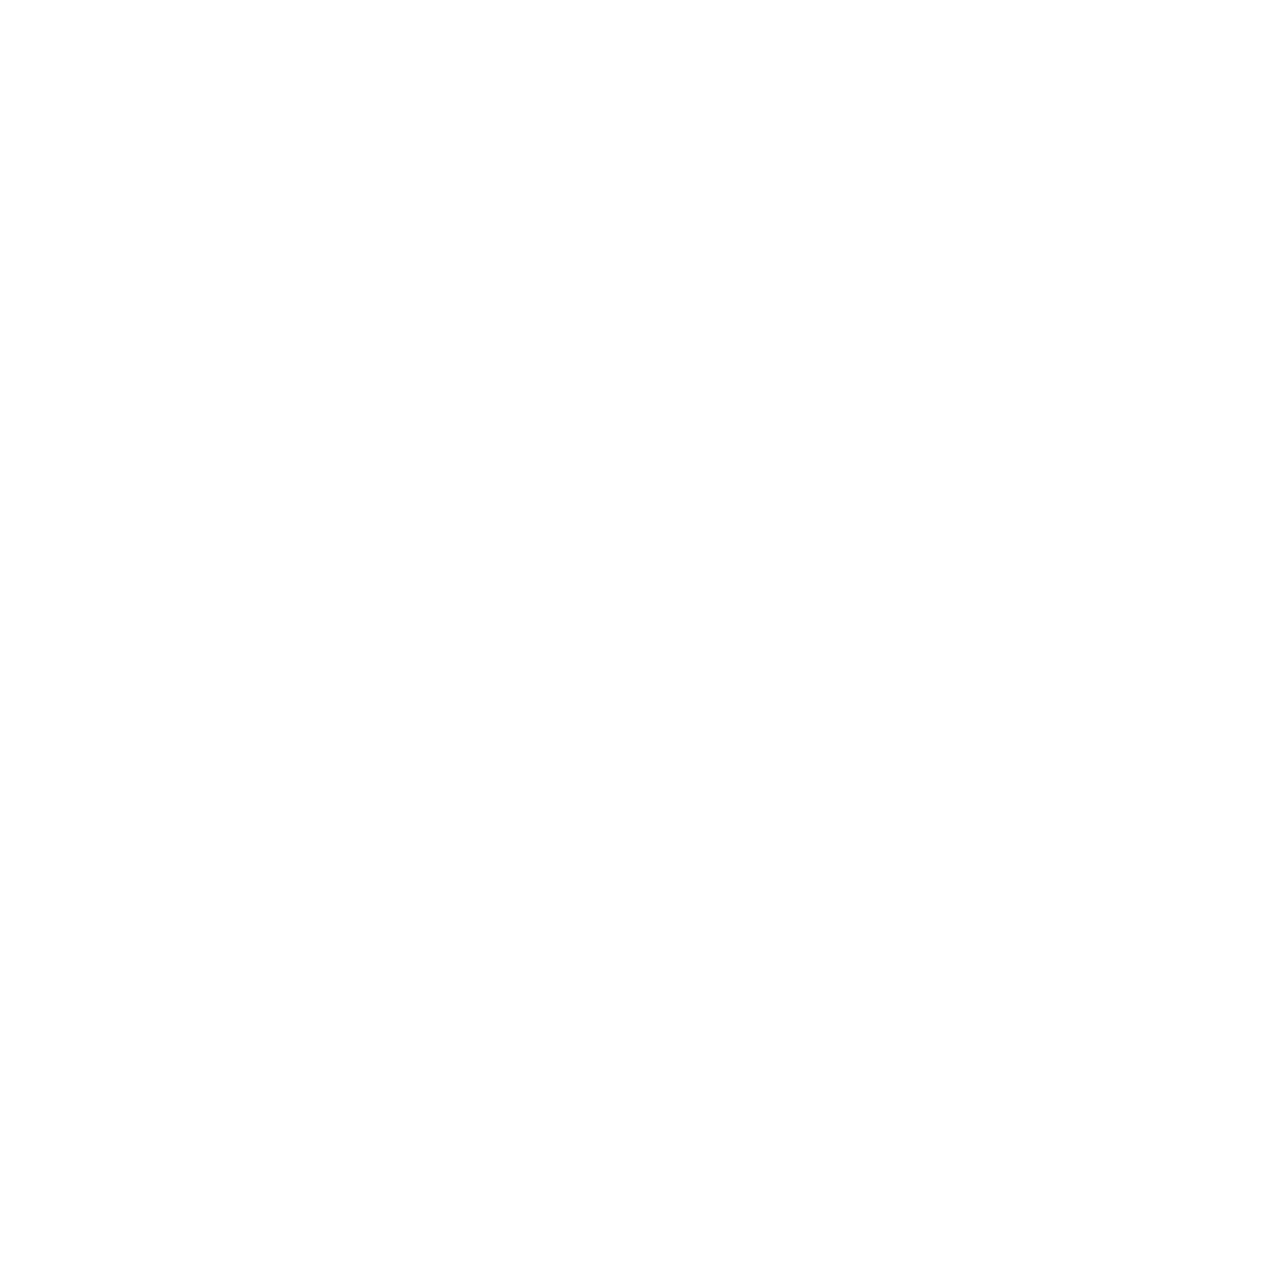

/home/bzr0014/miniconda3/envs/additive/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  


<IPython.core.display.Javascript object>


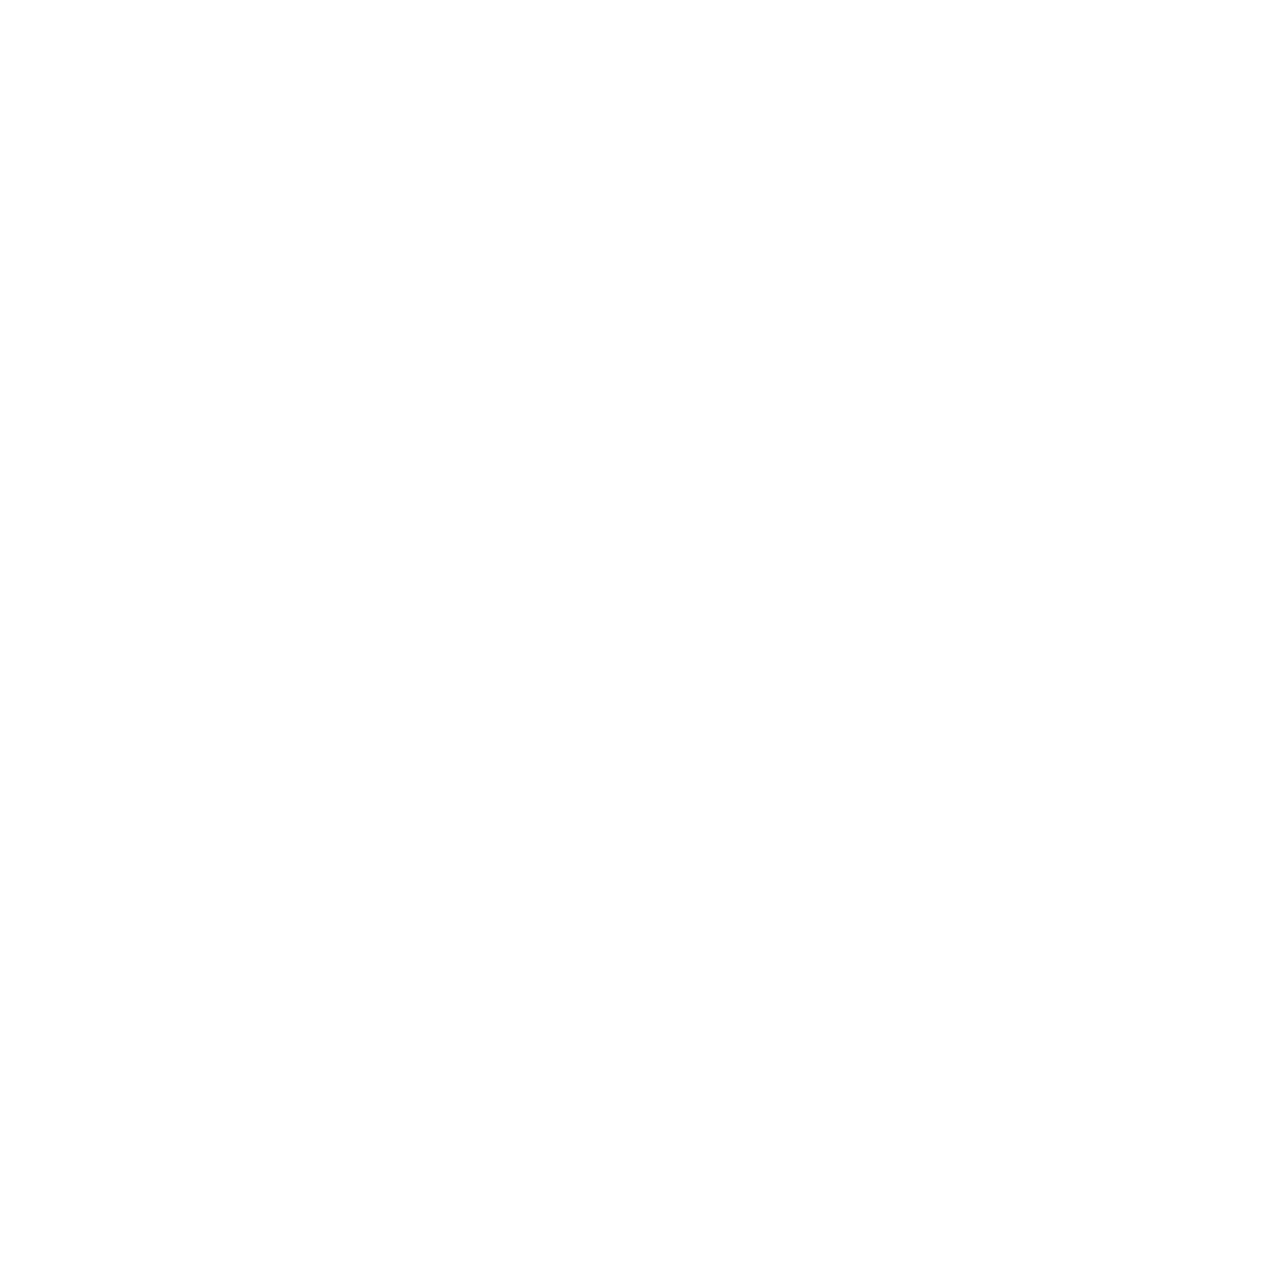

In [42]:
fig, axes = plt.subplots(figsize=(8, 8))
ax = fig.gca(projection='3d')
plot_3d_surface(tilter, step=70, ax=ax, cmap='jet')
plot_3d_surface(image+500, step=70, ax=ax, cmap='jet')

In [43]:
# plt.savefig(f"/home/ben_rasoolov/additive_data/figures/3d_tilted_vs_original_{f}.png", dpi=300)

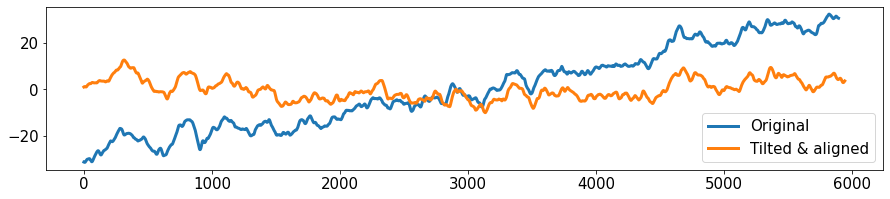

In [44]:
%matplotlib inline
font = {'size'   : 15}
matplotlib.rc('font', **font)
fig, axes = plt.subplots(figsize=(15, 3))
axis=1
t1 = image[500:-500, 500:-500]
t2 = tilter[500:-500, 500:-500]
t1 = t1 - t1.mean()
t2 = t2 - t2.mean()
plt.plot(np.arange(t1.shape[1-axis]), t1.mean(axis=axis), label="Original", linewidth=3)
plt.plot(np.arange(t2.shape[1-axis]), t2.mean(axis=axis), label="Tilted & aligned", linewidth=3)
axes.legend()
d, f, e = dfe(file)
plt.savefig(f"../data/figures/side_view_tilted_vs_original_{f}.png", dpi=300)

In [ ]:
import tensorflow as tf

In [ ]:
%load_ext autoreload
%autoreload 2
import numpy as np
import joblib
import glob
files = glob.glob("/home/ben_rasoolov/additive_data/experiment_03/*info")
file_name = np.random.choice(files)
print(file_name)
data = joblib.load(file_name)
image = np.array(data['value'].x)

In [ ]:
from additive.preprocessing import *

In [ ]:
thresh = image.mean()-image.std()
get_image_alignment_slope(image[:, 300:-300], thresh)#, image.mean()-image.std())

In [ ]:
rotated_image = correct_aligment(image, 300)

In [ ]:
get_image_alignment_slope(rotated_image[:, 300:-300], 0)

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(rotated_image)

In [ ]:
from additive.preprocessing import adjust_tilt

In [ ]:
tilted_rotated_image = adjust_tilt(rotated_image[1000:-1000, 300:-300], 8)

In [ ]:
tilted_rotated_image.max()

In [ ]:
plt.imshow(tilted_rotated_image)

In [ ]:
plt.imshow(rotated_image[1000:-1000, 300:-300])

# Experiment 3: getting global stats

In [1]:
%load_ext autoreload
%autoreload 2
%reset -f
import numpy as np
import joblib
import glob
from imports import *
from additive.feature_functions import feature_functions_functions as feature_funs
from additive.features import Features
from additive.preprocessing import load_and_process_image
from functools import reduce
from operator import or_

In [2]:
def isin(values, text, ignore_case=False):
    if ignore_case:
        return reduce(or_, [v.lower() in text.lower() for v in values])
    return reduce(or_, [v in text for v in values])

In [3]:
################### ################### ################### ###################
# version 1: all files
#files = glob.glob("/home/ben_rasoolov/additive_data/experiment_03/*info")
#chosen_files = [f for f in files if isin(['v18', 'v12', 'v14', 'v13', 'v11', 'v17'], f, ignore_case=True)]
# version 2: v19 repeated measurements
################### ################### ################### ###################
info_files = glob.glob("/home/ben_rasoolov/additive_project/data/experiment_03//*_2.info")
chosen_files = info_files + [x.replace("_2", "") for x in info_files]
len(chosen_files)

8

In [122]:
def get_features(img, features=None):
    if features is None:
        return {feature: fun(img) for feature, fun in feature_funs.items()}
    return {feature: fun(img) for feature, fun in feature_funs.items() if feature in features}

In [5]:
from multiprocessing import Pool
import dask
def get_features_from_files(chosen_files, n_procs=8):
    images = bag.from_sequence(chosen_files)
    preprocessed_images = images.map(load_and_process_image,
                                 transform_fun=lambda data: np.array(data['value'].x), crop_size=(500, 300))
    features = preprocessed_images.map(get_features)
    with Pool(min(len(chosen_files), n_procs)) as p:
        with dask.config.set(pool=p):
            out = features.compute()
    return out

In [6]:
out = get_features_from_files(chosen_files)

[ 3.07227852e-03 -2.76017534e-03  3.11530051e-10  2.58426966e-07]
[ 5.31283997e-03 -7.50884270e-04 -5.12736799e-07  5.28862862e-09]
[ 7.28704370e-03  5.96422919e-04 -1.08035714e-06 -2.71210044e-07]
[ 3.18884910e-03 -1.12411201e-03 -5.38034798e-07  1.39545450e-07]
[ 7.37593597e-03  6.27058679e-04 -4.08412231e-07  1.56355537e-07]
[ 1.29852664e-02  1.02466631e-04 -1.86451899e-06  6.28399364e-08]
[ 7.67650896e-03 -1.30926715e-04 -1.18232699e-06  3.14384162e-07]
[ 9.88180838e-03  1.11280179e-03 -7.32214807e-07  8.97498073e-08]


In [7]:
import pandas as pd
from additive.utility import get_file_info
df = pd.DataFrame(dict(zip(chosen_files, out))).T
df.index = df.index.map(lambda x: x.split("/")[-1].split(".")[0]).rename("file")
df = df.reset_index()
df = get_file_info(df['file']).join(df)
df

ispolished specimen   T RL                           file      ra_1d  \
0       False      V19  T1  R    V19_T1_Right(Top)_500X_3D_2  17.153707   
1       False      V19  T2  R    V19_T2_Right(Top)_500X_3D_2  21.073246   
2       False      V19  T1  L  V19_T1_Left(Bottom)_500X_3D_2  17.262126   
3       False      V19  T2  L  V19_T2_Left(Bottom)_500X_3D_2  20.947103   
4       False      V19  T1  R      V19_T1_Right(Top)_500X_3D  17.743369   
5       False      V19  T2  R      V19_T2_Right(Top)_500X_3D  22.013782   
6       False      V19  T1  L    V19_T1_Left(Bottom)_500X_3D  17.394297   
7       False      V19  T2  L    V19_T2_Left(Bottom)_500X_3D  21.643182   

       rq_1d    rsk_1d    rku_1d      rp_1d      rv_1d      ra_2d      rq_2d  \
0  21.003688  0.285355  2.630660  58.136482  47.280207  17.318466  21.243959   
1  25.881079  0.176053  2.650911  70.556634  61.533729  21.329844  26.250163   
2  21.181428  0.292029  2.683889  61.468178  46.909103  17.386746  21.412423   
3  25.736105  0.134779  2.720703  68.994370  63.440827  21.201433  26.128029   
4  21.699239  0.374067  2.679157  63.137758  46.921243  17.894806  21.931783   
5  26.931811  0.210536  2.635093  74.340308  61.690260  22.529411  27.570966   
6  21.292760  0.344018  2.704562  63.269488  46.717130  17.539195  21.547308   
7  26.475391  0.186703  2.633285  72.243692  61.522641  22.018653  27.023870   

        rp_2d       rv_2d    rsk_2d    rku_2d  
0   90.559808   63.503547  0.296151  2.662597  
1  115.246064   74.088965  0.205515  2.691686  
2  108.171758   61.679967  0.332384  2.789340  
3  126.151415  220.645633  0.165582  2.831415  
4   96.008826   63.881027  0.388786  2.710847  
5  119.371693   88.857183  0.246334  2.653679  
6  100.548958   85.585189  0.381685  2.815992  
7  118.424690   79.835154  0.236882  2.741941

In [8]:
res = df.iloc[:4, 5:].values - df.iloc[4:, 5:].values

In [12]:
from scipy.stats import t
t_value = t.ppf(.95, len(res)-1)
result = ((res.mean(axis=0) - res.std(axis=0)/2*t_value)>0) | ((res.mean(axis=0) + res.std(axis=0)/2*t_value)<0)

In [18]:
p1 = t.cdf(res.mean(axis=0) - res.std(axis=0)/2*t_value, len(res)-1)
p2 = 1 - t.cdf(res.mean(axis=0) + res.std(axis=0)/2*t_value, len(res)-1)
pvalue = np.minimum(p1, p2)
pvalue

array([2.09480165e-01, 1.85694937e-01, 4.70623194e-01, 4.74862735e-01,
       8.55409976e-03, 1.13572210e-01, 1.69687063e-01, 1.48046941e-01,
       1.54765531e-03, 9.67695177e-07, 4.67990495e-01, 4.71718225e-01])

In [30]:
pd.concat([pd.Series(result.reshape(-1), name='reject_null'), 
           pd.Series(pvalue.reshape(-1), name='pvalue').round(decimals=2)], axis=1)

reject_null  pvalue
0          True    0.21
1          True    0.19
2          True    0.47
3         False    0.47
4          True    0.01
5         False    0.11
6          True    0.17
7          True    0.15
8         False    0.00
9         False    0.00
10         True    0.47
11        False    0.47

In [ ]:
#df.to_csv("/home/ben_rasoolov/additive_data/paper/global_stats_tilted_rotated_cropped_v02.csv")

## Statistical tests

In [2]:
%load_ext autoreload
%autoreload 2
%reset -f
from imports import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
#client = Client("tcp://10.142.0.26:8786")
#client = Client(scheduler_file="/home/ben_rasoolov/sched")
#client.restart()

In [5]:
df = pd.read_csv("/home/ben_rasoolov/additive_project/data/paper/data/global_stats_tilted_rotated_cropped_v02.csv")
res = df.groupby(['specimen', 'ispolished']).agg(['mean'])

In [6]:
tmp = df.sort_values(['ispolished', 'specimen', 'T', 'RL'])

In [7]:
r = tmp[tmp['RL'] == 'R']
l = tmp[tmp['RL'] == 'L']
rl = r.merge(l, on=['ispolished', 'specimen', 'T'], suffixes=["_r", "_l"])

In [8]:
cols = ['ra_1d', 'rq_1d',
       'rsk_1d', 'rku_1d', 'rp_1d', 'rv_1d', 'ra_2d', 'rq_2d',
       'rp_2d', 'rv_2d', 'rsk_2d', 'rku_2d']
col = np.random.choice(cols)
for col in cols:
    m = (rl[col+"_r"] - rl[col+"_l"]).std()/np.sqrt(len(rl))
    t1 = (rl[col+"_r"] - rl[col+"_l"]).mean() - 1.75 * m
    t2 = (rl[col+"_r"] - rl[col+"_l"]).mean() + 1.75 * m
    print(col, t1, t2)

ra_1d -0.29316302015631557 1.036193849802721
rq_1d -0.17777777798646016 1.177307755441356
rsk_1d -0.12494176580932576 0.06311393476027599
rku_1d -0.3254137505947224 0.36110903169177916
rp_1d -0.8437729792916301 1.975157118373886
rv_1d 0.5906327272247072 2.5087913326933213
ra_2d -0.2735570707720188 1.0416534191733668
rq_2d -0.1574477248722843 1.1776586877126682
rp_2d -11.039696243514546 2.394457756979916
rv_2d -0.9669497488438359 5.966071751897761
rsk_2d -0.12104258856503139 0.048531157511327944
rku_2d -0.26266747616250447 0.34506696662629094


In [9]:
df

ispolished specimen   T RL                                  file  \
0        False      V17  T2  R             V17_T2_Right(Top)_500X_3D   
1        False      V13  T1  L           V13_T1_Left(Bottom)_500X_3D   
2         True      V11  T1  L  Polished_V11_T1_Left(Bottom)_500X_3D   
3        False      V11  T2  R             V11_T2_Right(Top)_500X_3D   
4        False      V12  T1  R             V12_T1_Right(Top)_500X_3D   
5        False      V17  T2  L           V17_T2_Left(Bottom)_500X_3D   
6        False      V14  T2  L           V14_T2_Left(Bottom)_500X_3D   
7        False      V13  T2  R             V13_T2_Right(Top)_500X_3D   
8        False      V18  T2  L           V18_T2_Left(Bottom)_500X_3D   
9         True      V11  T1  R    Polished_V11_T1_Right(Top)_500X_3D   
10       False      V13  T1  R             V13_T1_Right(Top)_500X_3D   
11       False      V14  T1  L           V14_T1_Left(Bottom)_500X_3D   
12       False      V18  T2  R             V18_T2_Right(Top)_500X_3D   
13       False      V11  T2  L           V11_T2_Left(Bottom)_500X_3D   
14        True      V17  T1  L  Polished_V17_T1_Left(Bottom)_500X_3D   
15        True      V11  T2  R    Polished_V11_T2_Right(Top)_500X_3D   
16        True      V11  T2  L  Polished_V11_T2_Left(Bottom)_500X_3D   
17       False      V17  T1  R             V17_T1_Right(Top)_500X_3D   
18        True      V13  T1  R    Polished_V13_T1_Right(Top)_500X_3D   
19       False      V11  T1  L           V11_T1_Left(Bottom)_500X_3D   
20       False      V11  T1  R             V11_T1_Right(Top)_500X_3D   
21       False      V12  T2  R             V12_T2_Right(Top)_500X_3D   
22       False      V14  T1  R             V14_T1_Right(Top)_500X_3D   
23       False      V12  T1  L           V12_T1_Left(Bottom)_500X_3D   
24        True      V17  T2  L  Polished_V17_T2_Left(Bottom)_500X_3D   
25       False      V17  T1  L           V17_T1_Left(Bottom)_500X_3D   
26       False      V18  T1  R             V18_T1_Right(Top)_500X_3D   
27       False      V12  T2  L           V12_T2_Left(Bottom)_500X_3D   
28        True      V17  T1  R    Polished_V17_T1_Right(Top)_500X_3D   
29        True      V13  T2  L  Polished_V13_T2_Left(Bottom)_500X_3D   
30        True      V13  T1  L  Polished_V13_T1_Left(Bottom)_500X_3D   
31       False      V13  T2  L           V13_T2_Left(Bottom)_500X_3D   
32        True      V13  T2  R    Polished_V13_T2_Right(Top)_500X_3D   
33        True      V17  T2  R    Polished_V17_T2_Right(Top)_500X_3D   
34       False      V14  T2  R             V14_T2_Right(Top)_500X_3D   
35       False      V18  T1  L           V18_T1_Left(Bottom)_500X_3D   

        ra_1d      rq_1d    rsk_1d    rku_1d      rp_1d      rv_1d      ra_2d  \
0   20.367282  25.141885 -0.043377  2.692481  66.080730  66.391047  20.512985   
1   21.104536  26.193603  0.032069  2.879431  70.324724  74.886901  21.314308   
2    4.527431   6.208072 -2.083207  7.491663   5.929927  28.451027   4.862916   
3   19.051853  23.286449  0.069212  2.556587  60.847256  55.875495  19.321375   
4   19.643611  24.341770 -0.136598  2.906672  61.436551  70.503110  19.969894   
5   17.995050  22.312795 -0.019567  2.769843  58.561165  61.415199  18.154397   
6   17.208462  21.524176  0.578931  3.525852  74.900303  45.582311  17.327398   
7    9.673651  12.161879 -1.451079  4.620403  11.913197  45.538838   9.861045   
8   24.144756  29.346941  0.017985  2.483493  74.027413  71.203955  24.466728   
9    6.192697   7.930921 -1.656373  5.331377   7.676874  31.480531   6.428117   
10  21.668242  26.974085  0.103231  2.875700  74.689298  74.596831  21.888691   
11  16.441025  20.102957  0.211128  2.639909  57.559230  46.490097  16.544520   
12  26.158866  31.653838 -0.053646  2.407116  75.228121  78.436840  26.485163   
13  18.695940  22.990538  0.059173  2.640564  62.974622  55.797110  18.830656   
14  10.498238  12.427238 -0.212123  2.207155  21.022304  33.709958  10.569368   
15   7.913196   9.857359 -1.438924  4.42278

# Extracting features

In [93]:
%reset -f
%load_ext autoreload
%autoreload 2
from additive.features import Features
from additive.utility import dfe
from imports import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
root_dir = "/home/ben_rasoolov/additive_project/data/"
def get_undone_files(big_file_dir, info_file_dir):
    root_dir = dfe(big_file_dir)[0]
    big_files  = glob.glob(big_file_dir)
    info_files = glob.glob(info_file_dir)
    undone_files = [f"{root_dir}/{x}.pd" 
                    for x in set(dfe(x)[1] for x in big_files)-set(dfe(x)[1] for x in info_files)]
    return undone_files

In [103]:
undone_files = get_undone_files(root_dir+"original_images/*pd", root_dir+"experiment_03/*info")
undone_files

['/home/ben_rasoolov/additive_project/data/original_images//V19_T2_Left(Bottom)_500X_3D_2.pd',
 '/home/ben_rasoolov/additive_project/data/original_images//V19_T1_Left(Bottom)_500X_3D_2.pd',
 '/home/ben_rasoolov/additive_project/data/original_images//V19_T2_Right(Top)_500X_3D_2.pd',
 '/home/ben_rasoolov/additive_project/data/original_images//V19_T1_Right(Top)_500X_3D_2.pd']

In [107]:
from additive.preprocessing import gkern2d
from scipy.ndimage import zoom, convolve
def get_all_stats(files, n_processes=4):
    s = np.array([2.330435, 2.33016])
    M = 31
    _ = gkern2d(M, 5)
    k3 = _ / _.sum()
    original_images = bag.from_sequence(files).map(joblib.load)
    resized_images   = original_images.map(zoom, zoom=1/s)
    smoothed_images = resized_images.map(convolve, weights=k3)
    c = smoothed_images.map(Features).map(lambda x: x.run_all_tests())
    from multiprocessing import Pool
    with dask.config.set(pool=Pool(min(n_processes, len(files)))):
        all_stats = c.compute()
    return all_stats

In [108]:
all_stats = get_all_stats(undone_files)

[*] Kernel sizes extracted
[*] Kernel sizes extracted
[*] Kernel sizes extracted
[*] Kernel sizes extracted
[*] Local minima extracted
[*] Local minima extracted
[*] Local minima extracted
[*] Local minima extracted
[*] Local maxima extracted
[*] Starting to run all tests.
[*] Starting to get global properties
[*] Local maxima extracted
[*] Starting to run all tests.
[*] Starting to get global properties
[*] Local maxima extracted
[*] Starting to run all tests.
[*] Starting to get global properties
[*] Local maxima extracted
[*] Starting to run all tests.
[*] Starting to get global properties
[*] Finished extracting circles from profile     0/ 6671
[*] Finished extracting circles from profile     0/ 6667
[*] Finished extracting circles from profile     0/ 6675
[*] Finished extracting circles from profile     0/ 6667


/home/ben_rasoolov/miniconda3/envs/additive/lib/python3.6/site-packages/scipy/optimize/minpack.py:454: RuntimeWarning: Number of calls to function has reached maxfev = 800.
  warnings.warn(errors[info][0], RuntimeWarning)
/home/ben_rasoolov/miniconda3/envs/additive/lib/python3.6/site-packages/scipy/optimize/minpack.py:454: RuntimeWarning: Number of calls to function has reached maxfev = 800.
  warnings.warn(errors[info][0], RuntimeWarning)
/home/ben_rasoolov/miniconda3/envs/additive/lib/python3.6/site-packages/scipy/optimize/minpack.py:454: RuntimeWarning: Number of calls to function has reached maxfev = 800.
  warnings.warn(errors[info][0], RuntimeWarning)
/home/ben_rasoolov/miniconda3/envs/additive/lib/python3.6/site-packages/scipy/optimize/minpack.py:454: RuntimeWarning: Number of calls to function has reached maxfev = 800.
  warnings.warn(errors[info][0], RuntimeWarning)


[*] Finished extracting circles from profile   500/ 6667
[*] Finished extracting circles from profile   500/ 6675
[*] Finished extracting circles from profile   500/ 6671
[*] Finished extracting circles from profile   500/ 6667
[*] Finished extracting circles from profile  1000/ 6667
[*] Finished extracting circles from profile  1000/ 6671
[*] Finished extracting circles from profile  1000/ 6675
[*] Finished extracting circles from profile  1000/ 6667
[*] Finished extracting circles from profile  1500/ 6667
[*] Finished extracting circles from profile  1500/ 6671
[*] Finished extracting circles from profile  1500/ 6675
[*] Finished extracting circles from profile  1500/ 6667
[*] Finished extracting circles from profile  2000/ 6667
[*] Finished extracting circles from profile  2000/ 6671
[*] Finished extracting circles from profile  2000/ 6667
[*] Finished extracting circles from profile  2000/ 6675
[*] Finished extracting circles from profile  2500/ 6667
[*] Finished extracting circles

/home/ben_rasoolov/additive_project/additive/features.py:84: UserWarning: Warning: converting a masked element to nan.
  np.array([np.mean(np.sort(self.x[n][self.local_minima[n]])[-10:]) for n in range(len(self.x))])
/home/ben_rasoolov/additive_project/additive/features.py:84: UserWarning: Warning: converting a masked element to nan.
  np.array([np.mean(np.sort(self.x[n][self.local_minima[n]])[-10:]) for n in range(len(self.x))])
/home/ben_rasoolov/additive_project/additive/features.py:84: UserWarning: Warning: converting a masked element to nan.
  np.array([np.mean(np.sort(self.x[n][self.local_minima[n]])[-10:]) for n in range(len(self.x))])


[*] Starting to get global properties


/home/ben_rasoolov/additive_project/additive/features.py:84: UserWarning: Warning: converting a masked element to nan.
  np.array([np.mean(np.sort(self.x[n][self.local_minima[n]])[-10:]) for n in range(len(self.x))])
Process ForkPoolWorker-32:
Process ForkPoolWorker-31:
Process ForkPoolWorker-33:
Process ForkPoolWorker-34:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/ben_rasoolov/miniconda3/envs/additive/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/ben_rasoolov/miniconda3/envs/additive/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/ben_rasoolov/miniconda3/envs/additive/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/ben_rasoolov/miniconda3/envs/additive/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()

In [112]:
for name, value in zip(undone_files, all_stats):
    dic = {'name': name, 'variation': 'Normal', 'value': value}
    d, f, e = dfe(name)
    path = root_dir+"experiment_03/"+f+".info"
    print(path)
    if os.path.exists(path):
        print(f"path {path} exists")
        continue
    joblib.dump(dic, path)

/home/ben_rasoolov/additive_project/data/experiment_03/V19_T2_Left(Bottom)_500X_3D_2.info
/home/ben_rasoolov/additive_project/data/experiment_03/V19_T1_Left(Bottom)_500X_3D_2.info
/home/ben_rasoolov/additive_project/data/experiment_03/V19_T2_Right(Top)_500X_3D_2.info
/home/ben_rasoolov/additive_project/data/experiment_03/V19_T1_Right(Top)_500X_3D_2.info


# Getting Stats for different variations

In [1]:
%reset -f
%load_ext autoreload
%autoreload 2
from imports import *
from additive.features import Features
root = "/home/ben_rasoolov/additive_project/data/dataset"
file_names = set(glob.glob(f'{root}/*_3d.features'))  - {f'{root}/v06_T2_L_3d.features'}
len(file_names)

22

In [2]:
images_mapper = [
      'Original', # lambda x, #x, 
      '25% area', # lambda x, # random_sub_image(x, .5),
      '6.25% area', # lambda x, # random_sub_image(x, .25),

      '50% length', # lambda x, # random_sub_length_image(x, .5),
      '25% length', # lambda x, # random_sub_length_image(x, .25),
#          '50% length rotate', # lambda x, # align_image(random_sub_length_image(x)),
#          '50% length tilt', # lambda x, # adjust_tilt(random_sub_length_image(x)),
      'Tilted', # lambda x, # adjust_tilt(x),
      'Tilted & Rotated', # lambda x, # adjust_tilt(align_image(x))
      '50% width', # lambda x, # random_sub_width_image(x),
      '25% width', # lambda x, # random_sub_width_image(x, .25),
#          '50% width tilt', # lambda x, # adjust_tilt(random_sub_width_image(x)),
#          '50% random', # lambda x, # random_sub_profile_image(x, .50),

]

In [4]:
indices = [0, 1, 2, 3, 4, 7, 8]
out = []
def get_all_stats(file_name):
    res = joblib.load(file_name)
    print(file_name)
    tmp = pd.concat([res[i].statistics.assign(Variation=images_mapper[i]) for i in indices])
    return tmp.assign(file=file_name.split("/")[-1])
with Pool(8) as p:
    out = p.map(get_all_stats, file_names)

/home/ben_rasoolov/additive_project/data/dataset/v04_T2_L_3d.features
/home/ben_rasoolov/additive_project/data/dataset/v05_T1_R_3d.features
/home/ben_rasoolov/additive_project/data/dataset/v03_T2_L_3d.features
/home/ben_rasoolov/additive_project/data/dataset/v02_T1_R_3d.features
/home/ben_rasoolov/additive_project/data/dataset/v06_T1_R_3d.features
/home/ben_rasoolov/additive_project/data/dataset/v05_T1_L_3d.features
/home/ben_rasoolov/additive_project/data/dataset/v05_T2_L_3d.features
/home/ben_rasoolov/additive_project/data/dataset/v01_T1_L_3d.features
/home/ben_rasoolov/additive_project/data/dataset/v02_T1_L_3d.features
/home/ben_rasoolov/additive_project/data/dataset/v06_T1_L_3d.features
/home/ben_rasoolov/additive_project/data/dataset/v01_T2_L_3d.features
/home/ben_rasoolov/additive_project/data/dataset/v04_T2_R_3d.features
/home/ben_rasoolov/additive_project/data/dataset/v02_T2_R_3d.features
/home/ben_rasoolov/additive_project/data/dataset/v02_T2_L_3d.features
/home/ben_rasoolov/a

In [6]:
stats = pd.concat(out)

In [7]:
stats.to_csv("/home/ben_rasoolov/additive_project/data/paper/stats.csv", index=False)

In [28]:
cond = stats['Variation'] != '6.25% area'
data = stats[cond].groupby(['file', 'Variation']).mean().reset_index()
data = data.set_index(['Variation', 'file']).stack().rename('Statistic Value($\mu m$)').reset_index()\
    .rename(columns = {"level_2": "Measure"})

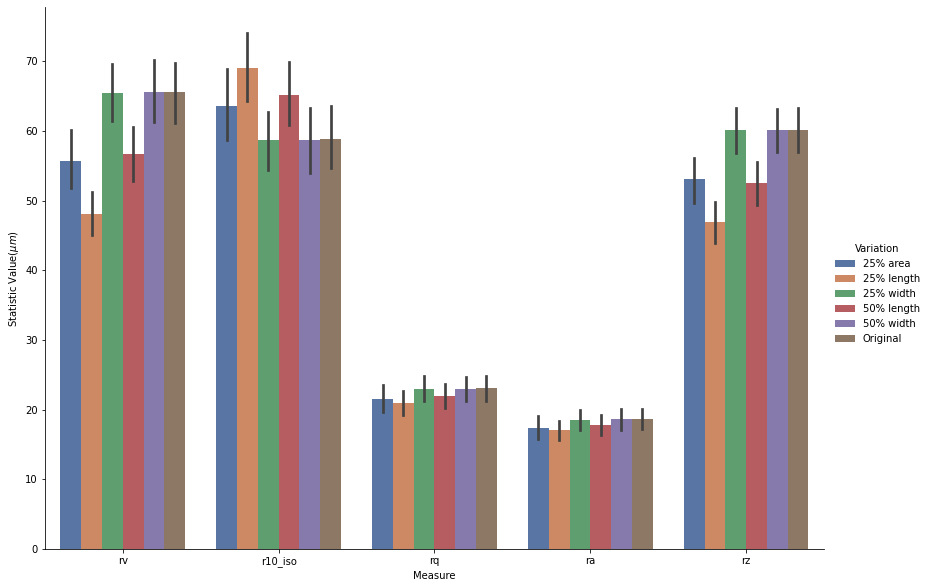

In [29]:
sns.set_palette("deep")
ax = sns.catplot(data=data, kind='bar',  height=8.27, aspect=11.7/8.27, 
                 x='Measure', y='Statistic Value($\mu m$)', hue='Variation')
#savefig('global_measure_comparison.svg')

In [1]:
%reset -f
%load_ext autoreload
%autoreload 2
from imports import *
from additive.feature_functions import feature_functions_functions as feature_functions

In [2]:
files = ['/home/ben_rasoolov/additive_project/data/experiment_03/V17_T2_Right(Top)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V13_T1_Left(Bottom)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/Polished_V11_T1_Left(Bottom)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V11_T2_Right(Top)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V12_T1_Right(Top)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V17_T2_Left(Bottom)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V14_T2_Left(Bottom)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V13_T2_Right(Top)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V18_T2_Left(Bottom)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/Polished_V11_T1_Right(Top)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V13_T1_Right(Top)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V14_T1_Left(Bottom)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V18_T2_Right(Top)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V11_T2_Left(Bottom)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/Polished_V17_T1_Left(Bottom)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/Polished_V11_T2_Right(Top)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/Polished_V11_T2_Left(Bottom)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V17_T1_Right(Top)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/Polished_V13_T1_Right(Top)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V11_T1_Left(Bottom)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V11_T1_Right(Top)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V12_T2_Right(Top)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V14_T1_Right(Top)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V12_T1_Left(Bottom)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/Polished_V17_T2_Left(Bottom)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V17_T1_Left(Bottom)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V18_T1_Right(Top)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V12_T2_Left(Bottom)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/Polished_V17_T1_Right(Top)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/Polished_V13_T2_Left(Bottom)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/Polished_V13_T1_Left(Bottom)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V13_T2_Left(Bottom)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/Polished_V13_T2_Right(Top)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/Polished_V17_T2_Right(Top)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V14_T2_Right(Top)_500X_3D.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V18_T1_Left(Bottom)_500X_3D.info']

In [28]:
variations = []

def var_fun(fun):
    variations.append((fun.__name__, fun))
    return fun

@var_fun
def original(img):
    return img

@var_fun
def half_area_center(img):
    w, h = img.shape
    cw, ch = w//2, h//2
    #x, y = np.random.randint(max(1,w-ww)), np.random.randint(max(1,h-hh))
    return img[cw-w//4:cw+w//4, ch-h//4:ch+h//4]

@var_fun
def half_length_center(img):
    w, h = img.shape
    cw, ch = w//2, h//2
    return img[:, ch-h//4:ch+h//4]

@var_fun
def half_width_center(img):
    w, h = img.shape
    cw, ch = w//2, h//2
    return img[cw-w//4:cw+w//4, :]

@var_fun
def random_profiles(img, ratio=.5):
    return img[np.random.rand(len(img))<ratio]


@var_fun
def half_length_left(img, ratio=.5):
    w, h = img.shape
    return img[:, :h//2]

@var_fun
def half_length_right(img, ratio=.5):
    w, h = img.shape
    return img[:, h//2:]

@var_fun
def half_width_top(img, ratio=.5):
    w, h = img.shape
    return img[:w//2, :]

@var_fun
def half_width_bottom(img, ratio=.5):
    w, h = img.shape
    return img[w//2:, :]

In [29]:
my_funs = [(k, v) for k, v in feature_functions.items() if '1d' in k]

In [35]:
def prepare_image(data):
    image = np.array(data['value'].x)[500:-500, 500:-500]
    out = {}
    for variation, var_fun in variations:
        for feature, feature_fun in my_funs:
            x = var_fun(image)
            print(x.shape)
            out[variation, feature] = feature_fun(x)
    return out

# Download files

In [18]:
%load_ext autoreload
%autoreload 2
%reset -f
from imports import *
from additive.utility import dfe
from sh import wget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
links = {
    "V19_T1_Left(Bottom)_500X_3D_2.csv": "https://auburn.box.com/shared/static/0iy6dopmmq8c8owpkjc1rddn48czeam1.csv",
    "V19_T1_Right(Top)_500X_3D_2.csv": "https://auburn.box.com/shared/static/i39htg5ku0wxphc9l6yebe63g7qatsd9.csv",
    "V19_T2_Left(Bottom)_500X_3D_2.csv": "https://auburn.box.com/shared/static/856x1lsjqr0ldl7dlesv1rsyzdw84b3x.csv",
    "V19_T2_Right(Top)_500X_3D_2.csv": "https://auburn.box.com/shared/static/6kykrfjuwiounoduupk4yebuq2ah4k80.csv"
}

In [22]:
#for name, link in links.items():
#    wget(link, "-O", "/home/ben_rasoolov/additive_project/data/original_images/"+name)

In [23]:
csv_files = glob.glob("/home/ben_rasoolov/additive_project/data/original_images/*csv")
csv_files

['/home/ben_rasoolov/additive_project/data/original_images/V19_T1_Left(Bottom)_500X_3D_2.csv',
 '/home/ben_rasoolov/additive_project/data/original_images/V19_T2_Left(Bottom)_500X_3D_2.csv',
 '/home/ben_rasoolov/additive_project/data/original_images/V19_T2_Right(Top)_500X_3D_2.csv',
 '/home/ben_rasoolov/additive_project/data/original_images/V19_T1_Right(Top)_500X_3D_2.csv']

In [27]:
def proces_csv_files(file):
    print(file)
    d, f, e = dfe(file)
    x = pd.read_csv(file, header=None)
    joblib.dump(x.values.astype('float32'), d+f+".pd")

In [28]:
with Pool(4) as p:
    p.map(proces_csv_files, csv_files)

/home/ben_rasoolov/additive_project/data/original_images/V19_T2_Left(Bottom)_500X_3D_2.csv/home/ben_rasoolov/additive_project/data/original_images/V19_T1_Right(Top)_500X_3D_2.csv/home/ben_rasoolov/additive_project/data/original_images/V19_T1_Left(Bottom)_500X_3D_2.csv/home/ben_rasoolov/additive_project/data/original_images/V19_T2_Right(Top)_500X_3D_2.csv





# Experiment: Comparing repeated measures

In [86]:
%load_ext autoreload
%autoreload 2
%reset -f

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
from imports import *
from additive.utility import dfe, get_file_info
from sh import wget
from numpy import genfromtxt

In [88]:
info_files = glob.glob("/home/ben_rasoolov/additive_project/data/experiment_03//*_2.info")
info_files = info_files + [x.replace("_2", "") for x in info_files]

In [90]:
def get_stats_from_file(data):
    if isinstance(data, str):
        data = joblib.load(data)['value']
    return data.statistics, data.circle_statistics#.describe()

In [91]:
with Pool(8) as p:
    all_stats_ = p.map(get_stats_from_file, info_files)

In [95]:
global_stats_ = [x for x, y in all_stats_]
circle_stats_ = [y for x, y in all_stats_]

In [96]:
global_stats = pd.concat([x.assign(file=dfe(f)[1]) for x, f in zip(global_stats_, info_files)])\
    .reset_index()#.drop('index', axis=1)#.rename(columns={"index": "measure"})
global_stats['repetition'] = global_stats['file'].str.contains("_2") * 1 + 1
global_stats['file'] = global_stats['file'].str.replace("_2", '')
global_stats

index          rv         ra         rz         rq    r10_iso  \
0          0  180.668280  28.297204  18.416615  40.537096        NaN   
1          1  179.286918  29.452539  19.470803  41.059895        NaN   
2          2  176.691939  31.504457  21.499101  42.336516        NaN   
3          3  173.161809  34.531464  24.366313  44.567935        NaN   
4          4  169.000613  38.458735  27.918929  47.696514        NaN   
...      ...         ...        ...        ...        ...        ...   
55684   7245   87.966996  16.938349  18.855455  22.201247  60.226305   
55685   7246   75.403560  13.912015  14.814021  18.700508  49.211100   
55686   7247   62.561338  11.055807  11.367236  15.344890  39.316375   
55687   7248   51.975379   8.899100   8.829132  12.696007  31.425529   
55688   7249   45.982700   7.752109   7.481262  11.238276  27.938360   

                              file  repetition  
0        V19_T1_Right(Top)_500X_3D           2  
1        V19_T1_Right(Top)_500X_3D           2  
2        V19_T1_Right(Top)_500X_3D           2  
3        V19_T1_Right(Top)_500X_3D           2  
4        V19_T1_Right(Top)_500X_3D           2  
...                            ...         ...  
55684  V19_T2_Left(Bottom)_500X_3D           1  
55685  V19_T2_Left(Bottom)_500X_3D           1  
55686  V19_T2_Left(Bottom)_500X_3D           1  
55687  V19_T2_Left(Bottom)_500X_3D           1  
55688  V19_T2_Left(Bottom)_500X_3D           1  

[55689 rows x 8 columns]

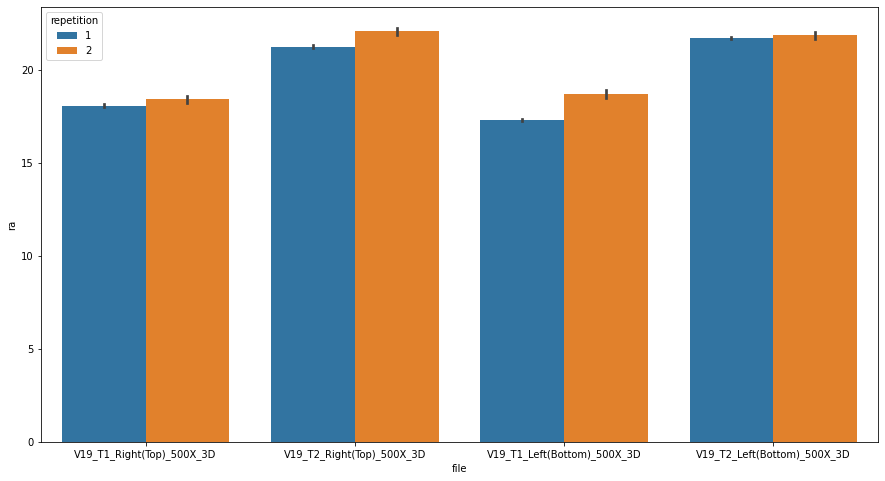

In [107]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(15, 8))
#tt = t.stack().reset_index().rename(columns={'level_2': 'measure', 0: 'value'})
sns.barplot(data=global_stats, x='file', y='ra', hue='repetition')

In [106]:
from scipy.stats import ttest_ind
for col in ['rho', 'ra', 'rv', 'rz', 'rq']:
    if col not in global_stats.columns:
        continue
    for file in np.unique(global_stats['file']):
        cond1 = (global_stats['repetition'] == 1) & (global_stats['file'] == file)
        cond2 = (global_stats['repetition'] == 2) & (global_stats['file'] == file)
        ra = global_stats[col]
        pvalue = ttest_ind(ra[cond1], ra[cond2]).pvalue
        if pvalue > .05:
            print(file, col, pvalue)

V19_T2_Left(Bottom)_500X_3D ra 0.15426378822213835
V19_T2_Left(Bottom)_500X_3D rv 0.15046199388792791
V19_T2_Left(Bottom)_500X_3D rq 0.056542146837501715


In [32]:
s = np.array([2.330435, 2.33016])
1/s

array([0.42910444, 0.42915508])

# polished vs unpolished surface analysis with equaizeHist
Todo:
- align and tilt before doing histogram equalization and see if the results match

In [1]:
%load_ext autoreload
%autoreload 2
%reset -f
from imports import *

In [2]:
_ = [x.split('\t') for x in """Surface Condition	specimen	Frequency (Hz)	Strain Amplitude (mm/mm)	Fatigue Life (cylces)	Reversal to failure (2Nf)
As-built	V02	5	0.004	45859	91718
As-built	V10	5	0.004	49177	98354
As-built	V04	7.5	0.003	91222	182444
As-built	V16	7.5	0.003	110013	220026
As-built	V08	7.5	0.003	136464	272928
As-built	V12	8	0.0025	192404	384808
As-built	V18	8	0.0025	259128	518256
As-built	V14	8	0.0025	320856	641712
As-built	V06	10	0.002	5000000	10000000
Half-polished	V07	5	0.004	50916	101832
Half-polished	V09	5	0.004	60992	121984
Half-polished	V15	7.5	0.003	132668	265336
Half-polished	V05	7.5	0.003	153540	307080
Half-polished	V03	7.5	0.003	163123	326246
Half-polished	V13	8	0.0025	287061	574122
Half-polished	V11	8	0.0025	291206	582412
Half-polished	V17	8	0.0025	395801	791602
Half-polished	V01	10	0.002	5000000	10000000""".split('\n')]
fatigue = pd.DataFrame(_[1:], columns=_[0])
#fatigue['Specimen ID'] = fatigue['Specimen ID']#.str.lower()
for c in ['Frequency (Hz)', 'Strain Amplitude (mm/mm)', 'Fatigue Life (cylces)', 'Reversal to failure (2Nf)']:
    fatigue[c] = pd.to_numeric(fatigue[c])
fatigue['ispolished'] = fatigue['Surface Condition'].str.contains('polish')
fatigue

Surface Condition specimen  Frequency (Hz)  Strain Amplitude (mm/mm)  \
0           As-built      V02             5.0                    0.0040   
1           As-built      V10             5.0                    0.0040   
2           As-built      V04             7.5                    0.0030   
3           As-built      V16             7.5                    0.0030   
4           As-built      V08             7.5                    0.0030   
5           As-built      V12             8.0                    0.0025   
6           As-built      V18             8.0                    0.0025   
7           As-built      V14             8.0                    0.0025   
8           As-built      V06            10.0                    0.0020   
9      Half-polished      V07             5.0                    0.0040   
10     Half-polished      V09             5.0                    0.0040   
11     Half-polished      V15             7.5                    0.0030   
12     Half-polished      V05             7.5                    0.0030   
13     Half-polished      V03             7.5                    0.0030   
14     Half-polished      V13             8.0                    0.0025   
15     Half-polished      V11             8.0                    0.0025   
16     Half-polished      V17             8.0                    0.0025   
17     Half-polished      V01            10.0                    0.0020   

    Fatigue Life (cylces)  Reversal to failure (2Nf)  ispolished  
0                   45859                      91718       False  
1                   49177                      98354       False  
2                   91222                     182444       False  
3                  110013                     220026       False  
4                  136464                     272928       False  
5                  192404                     384808       False  
6                  259128                     518256       False  
7                  320856                     641712       False  
8                 5000000                   10000000       False  
9                   50916                     101832        True  
10                  60992                     121984        True  
11                 132668                     265336        True  
12                 153540                     307080        True  
13                 163123                     326246        True  
14                 287061                     574122        True  
15                 291206                     582412        True  
16                 395801                     791602        True  
17                5000000                   10000000        True

In [3]:
from additive.utility import dfe, get_file_info
files = glob.glob("/home/ben_rasoolov/additive_project/data/experiment_03/*.info")
# files = get_file_info(pd.Series(files)).merge(fatigue, on='specimen')['files']
# files = files[~files.str.contains('V13')]

In [4]:
#polished_files = glob.glob("/home/ben_rasoolov/additive_project/data/experiment_03/Polished_*.info")
#asbuilt_files = [x.replace("Polished_", '') for x in polished_files]

In [5]:
# all_files = [ x for x in polished_files+asbuilt_files if os.path.exists(x)]

In [6]:
def min_max_scale(x, a=0, b=1):
    mn, mx = x.min(), x.max()
    rng = b - a
    out = (x - mn)/(mx-mn)
    return out * rng + a

In [7]:
from scipy.stats import mode
from additive.feature_functions import feature_functions_functions as feat_funs
def image_stats(x, feat_funs):
    funs = {k: v for k, v in feat_funs.items()}
    return compute({k: delayed(v)(x) for k, v in funs.items()})[0]

In [8]:
from additive.preprocessing import correct_aligment
def read_file_equalize_and_get_stats(file):
    data = joblib.load(file)
    image = np.array(data['value'].x)[500:-500, 500:-500]
    # image = load_and_process_image(file, lambda x: x['value'].x, (500, 500))
    # image = correct_aligment(image, l=300)
    scaled_image = min_max_scale(image, 0, 255).astype('uint8')
    equalized_image = cv2.equalizeHist(scaled_image)
    return image_stats(equalized_image)

def read_file_and_get_stats(file):
    data = joblib.load(file)
    image = np.array(data['value'].x)[500:-500, 500:-500]
    # image = load_and_process_image(file, lambda x: x['value'].x, (500, 500))
    # image = correct_aligment(image, l=300)
    return image_stats(image)

In [ ]:
with Pool(8) as p:
    # res = p.map(read_file_equalize_and_get_stats, files)
    res = p.map(read_file_and_get_stats, files)

In [10]:
out = pd.DataFrame(res).assign(file=[dfe(x)[1] for x in files])
equalized_stats = get_file_info(out, 'file').drop('file', axis=1)

In [17]:
# equalized_stats.to_csv("/home/ben_rasoolov/additive_project/data/paper/data/global_stats_equalize_hist_v01.csv")
files_to_drop = {'/home/ben_rasoolov/additive_project/data/experiment_03/V02_T1_L_3d.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V02_T1_R_3d.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V02_T2_L_3d.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V02_T2_R_3d.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V03_T1_L_3d.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V03_T1_R_3d.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V03_T2_L_3d.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V03_T2_R_3d.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V04_T1_L_3d.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V04_T1_R_3d.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V04_T2_L_3d.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V04_T2_R_3d.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V05_T1_L_3d.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V05_T1_R_3d.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V05_T2_L_3d.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V05_T2_R_3d.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V06_T1_L_3d.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V06_T1_R_3d.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V06_T2_L_3d.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V06_T2_R_3d.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V19_T1_Left(Bottom)_500X_3D_2.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V19_T1_Right(Top)_500X_3D_2.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V19_T2_Left(Bottom)_500X_3D_2.info',
 '/home/ben_rasoolov/additive_project/data/experiment_03/V19_T2_Right(Top)_500X_3D_2.info'}
t = equalized_stats.assign(file=files)
cond = ~t.file.isin(files_to_drop)
t[cond].to_csv("/home/ben_rasoolov/additive_project/data/paper/data/global_stats_no_transform_v01.csv")

In [12]:
cond = equalized_stats['ispolished']
polished_vs_unpolished = equalized_stats[cond]\
    .merge(
        equalized_stats[~cond], 
        on=['specimen', 'T', 'RL'],
        suffixes = ['_polished', '_unpolished']
    ).sort_values(['specimen', 'T', 'RL'])

In [124]:
chosen = polished_vs_unpolished[['specimen', 'T', 'RL', 'rp_2d_polished', 'rp_2d_unpolished', 'rv_2d_polished', 'rv_2d_unpolished']]
tmp = chosen# [chosen['specimen'] != 'V13']

In [136]:
res = equalized_stats[equalized_stats['specimen'] != 'V13'].groupby(['ispolished', 'specimen']).median()\
    .reset_index().merge(fatigue, on='specimen')
res['Reversal to failure (2Nf)'] = np.log(res['Reversal to failure (2Nf)'])
res = res.sort_values(['ispolished_x'], ascending=False).drop_duplicates('specimen')

In [137]:
# res = pd.read_csv("/home/ben_rasoolov/additive_project/data/paper/data/hist_equalized_global_stats_v02.csv")
res['Reversal to failure (2Nf)'] = np.exp(res['Reversal to failure (2Nf)'])

In [138]:
res.sort_values(['Reversal to failure (2Nf)'])

ispolished_x specimen      ra_1d      rq_1d    rsk_1d    rku_1d  \
2          False      V02  62.284003  72.099675 -0.024943  1.874644   
14         False      V10  61.405975  71.170445 -0.026037  1.899773   
10          True      V07  58.370217  67.089260 -0.133901  1.888236   
13          True      V09  48.948604  57.519433 -0.461537  2.630725   
5          False      V04  60.376728  70.305721 -0.021962  1.980787   
21         False      V16  62.764816  72.585250 -0.013355  1.845383   
20          True      V15  43.947882  51.731925 -0.482821  2.582426   
11         False      V08  61.575268  71.413332 -0.016413  1.899997   
7           True      V05  48.782117  57.213929 -0.296048  2.253622   
4           True      V03  46.138077  54.372172 -0.660386  2.647313   
17         False      V12  61.534946  71.191909 -0.018903  1.887337   
24         False      V18  60.608636  70.342762  0.014297  2.087752   
16          True      V11  41.736293  49.028744 -0.745729  3.176900   
18         False      V14  59.687899  69.471718 -0.013167  1.984921   
23          True      V17  58.583211  67.272757 -0.288679  1.917459   
8          False      V06  48.431843  57.868091  0.013777  2.626135   
1           True      V01  56.355884  64.314820 -0.408120  1.959156   

         rp_1d       rv_1d      ra_2d      rq_2d  ...    mode_1d  mode_2d  \
2   123.896189  127.507305  63.714914  73.590112  ...   2.944868     -5.5   
14  123.290664  126.871472  63.697031  73.555911  ...   7.884428    -18.5   
10  104.590633  124.607512  63.804496  73.666763  ...  47.534579     -8.0   
13   88.008317  124.608756  64.273125  74.052439  ...  35.526880     47.5   
5   124.030143  127.369881  63.757717  73.631955  ...   7.590736      2.5   
21  124.580007  127.184034  63.686873  73.547529  ...  -3.556843    -21.0   
20   78.847079  115.232571  63.923035  73.796936  ...  44.501221     93.5   
11  124.423290  126.579382  63.717955  73.567644  ...  -0.854986      6.0   
7    88.180401  124.328500  64.064994  73.889726  ...  33.933969     46.5   
4    72.296833  125.542178  64.096129  73.922122  ...  44.721489     74.5   
17  123.233029  126.545415  63.794720  73.656413  ...   3.036812     -9.5   
24  123.534422  126.721850  63.741046  73.596413  ...  15.812460     -2.5   
16   69.576776  120.134997  64.181059  74.062860  ...  36.787074     53.0   
18  123.746290  125.937712  63.641839  73.511164  ...  -7.030726     -6.5   
23   98.488066  126.842198  63.772418  73.672438  ...  63.137674    -14.0   
8   115.140520  120.377513  63.770432  73.632697  ...   2.101947     -4.0   
1    90.637832  125.929290  63.885913  73.778843  ...  66.526132     94.5   

    median        mean  Surface Condition  Frequency (Hz)  \
2    129.0  128.792558           As-built             5.0   
14   128.0  128.412229           As-built             5.0   
10   128.5  128.358510      Half-polished             5.0   
13   129.0  128.728096      Half-polished             5.0   
5    130.0  128.719705           As-built             7.5   
21   128.5  128.581611           As-built             7.5   
20   128.5  128.382323      Half-polished             7.5   
11   129.5  128.553609           As-built             7.5   
7    128.0  128.456295      Half-polished             7.5   
4    128.5  128.507025      Half-polished             7.5   
17   129.0  128.754246           As-built             8.0   
24   129.0  128.447424           As-built             8.0   
16   128.0  128.685210      Half-polished             8.0   
18   129.5  128.732125           As-built             8.0   
23   128.0  128.286057      Half-polished             8.0   
8    129.5  128.793138           As-built            10.0   
1    129.0  128.497792      Half-polished            10.0   

    Strain Amplitude (mm/mm)  Fatigue Life (cylces) Reversal to failure (2Nf)  \
2                     0.0040                  45859                   91718.0   
14                    0.0040                  49177                   98354.0

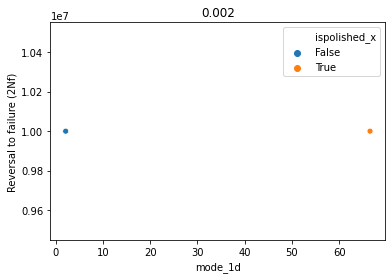

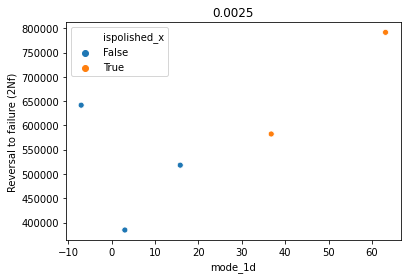

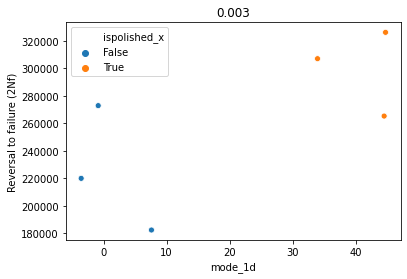

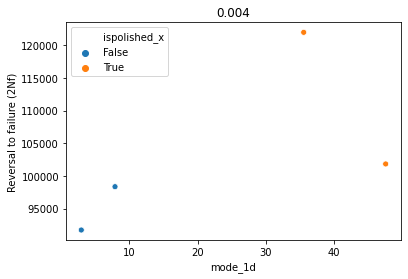

In [141]:
for strain in sorted(res['Strain Amplitude (mm/mm)'].unique()):
    cond = res['Strain Amplitude (mm/mm)'] == strain
    sns.scatterplot(data=res[cond], x='mode_1d', y='Reversal to failure (2Nf)', hue='ispolished_x')
    plt.title(strain)
    plt.show()

In [42]:
import re
from additive.utility import pick_cols
pick_cols(res, '(ispolished)|(Frequency)|(Fatigue)', reverse=True)\
    .sort_values('Reversal to failure (2Nf)')\
    #.to_csv( "/home/ben_rasoolov/additive_project/data/paper/data/hist_equalized_global_stats_v02.csv")

specimen      ra_1d      rq_1d    rsk_1d    rku_1d       rp_1d       rv_1d  \
2       V02  62.119727  71.940323 -0.025170  1.884803  124.003473  127.397553   
14      V10  61.351317  71.167198 -0.027082  1.905115  123.286870  126.927140   
10      V07  57.991264  66.608832 -0.134614  1.882088  104.400884  124.127296   
13      V09  48.500368  57.091276 -0.441006  2.692799   87.123127  124.403833   
5       V04  59.448304  69.380732 -0.022977  2.037573  123.331469  126.751334   
21      V16  62.755319  72.569349 -0.014693  1.845472  124.564646  127.226072   
20      V15  44.155439  51.810092 -0.476343  2.549454   79.313925  115.426169   
11      V08  61.616568  71.472211 -0.017599  1.900562  124.414485  126.606179   
7       V05  49.232581  58.183169 -0.300888  2.266286   91.064030  124.564406   
4       V03  46.995392  55.244381 -0.696228  2.653482   73.559058  125.584553   
17      V12  61.519966  71.268187 -0.019844  1.893568  123.488058  126.169313   
24      V18  60.604642  70.303568  0.019395  2.114391  123.226621  126.576398   
16      V11  41.080385  48.747603 -0.669675  3.138285   67.816128  119.382994   
18      V14  59.657695  69.399252 -0.005193  1.992617  123.392246  125.938817   
23      V17  58.172486  66.927868 -0.295113  1.922344   98.818941  126.869701   
8       V06  48.545229  57.734485  0.028323  2.638455  114.076626  117.144519   
1       V01  56.806961  64.787442 -0.405448  1.958130   91.148023  125.852803   

        ra_2d      rq_2d       rp_2d       rv_2d    rsk_2d    rku_2d  \
2   63.716802  73.589046  126.199550  128.800450 -0.017911  1.801539   
14  63.697043  73.555404  126.557163  128.442837 -0.011004  1.800566   
10  63.804029  73.672172  126.654215  128.345785 -0.008766  1.801073   
13  64.281298  74.060677  126.209240  128.790760 -0.013108  1.786769   
5   63.758218  73.622208  126.193281  128.806719 -0.018553  1.799998   
21  63.678521  73.533297  126.417498  128.582502 -0.011676  1.801352   
20  63.914563  73.809302  126.593722  128.406278 -0.007087  1.799071   
11  63.724200  73.576144  126.440536  128.559464 -0.014241  1.800352   
7   64.066617  73.903371  126.545167  128.454833 -0.008241  1.793100   
4   64.088518  73.922949  126.494465  128.505535 -0.007778  1.792050   
17  63.786792  73.646185  126.221360  128.778640 -0.017628  1.799703   
24  63.739904  73.596630  126.555493  128.444507 -0.011423  1.799742   
16  64.211779  74.053869  126.328097  128.671903 -0.010481  1.789900   
18  63.661046  73.514391  126.245654  128.754346 -0.015208  1.801502   
23  63.772401  73.668294  126.695439  128.304561 -0.007517  1.802545   
8   63.775645  73.639274  126.189780  128.810220 -0.017669  1.799477   
1   63.889889  73.781657  126.507071  128.492929 -0.006824  1.800958   

      mode_1d  mode_2d   median        mean Surface Condition  \
2    2.144227   -7.625  129.125  128.800450          As-built   
14   9.974985  -16.500  128.500  128.442837          As-built   
10  53.848065   14.250  128.500  128.345785     Half-polished   
13  35.728565   45.500  129.250  128.790760     Half-polished   
5    7.304917    2.375  129.625  128.806719          As-built   
21  -6.487822  -23.750  128.750  128.582502          As-built   
20  46.120527   91.750  128.500  128.406278     Half-polished   
11  -1.375329    6.000  129.250  128.559464          As-built   
7   36.478512   53.250  128.250  128.454833     Half-polished   
4   45.395849   71.750  128.500  128.505535     Half-polished   
17   3.843312   -4.000  129.250  128.778640          As-built   
24  15.914726   -1.250  128.750  128.444507          As-built   
16  32.553409   51.250  128.500  128.671903     Half-polished   
18  -6.498436   -8.000  129.500  128.754346          As-built   
23  62.581427  -18.250  128.000  128.304561     Half-polished   
8    2.944106   -1.000  129.750  128.810220          As-built   
1   67.679014   97.500  129.000  128.492929     Half-polished   

    Strain Amplitude (mm/mm)  Reversal to failure (2Nf)  
2                 

In [44]:
#cond = res['specimen'] > 'V06'

In [101]:
#x = res[['ra_1d']]
X = pick_cols(res, '(.*_.d)|(Strain)').values
y = np.log(res['Reversal to failure (2Nf)'].values)

In [103]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [104]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.2)

In [105]:
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)

In [84]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
model = RandomForestRegressor(n_estimators=1000, n_jobs=10)
model.fit(Xtrain, ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=10, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [88]:
#np.sqrt(((model.predict(Xtrain) - ytrain)**2).sum())
np.sqrt(((model.predict(Xtest) - ytest)**2).sum())

3.48689652420815

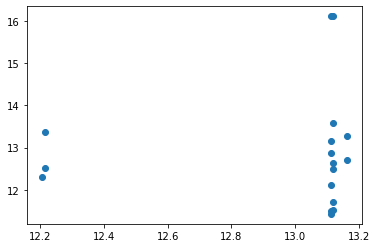

In [89]:
plt.scatter(model.predict(X), y)

In [106]:
from tensorflow import keras

In [118]:
model = keras.Sequential([
    keras.Input(Xtrain.shape[1]),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dropout(.3),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(.3),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(1),
])

In [119]:
model.compile(optimizer='adam', loss='mse', )

In [120]:
model.fit(Xtrain, ytrain, epochs=10000, validation_split=.2, 
          callbacks=[keras.callbacks.EarlyStopping(patience=100, restore_best_weights=True)])

Train on 10 samples, validate on 3 samples
Epoch 1/10000
10/10 [==============================] - 1s 93ms/sample - loss: 162.8927 - val_loss: 200.0758
Epoch 2/10000
10/10 [==============================] - 0s 3ms/sample - loss: 161.9148 - val_loss: 196.0650
Epoch 3/10000
10/10 [==============================] - 0s 2ms/sample - loss: 160.7957 - val_loss: 192.0151
Epoch 4/10000
10/10 [==============================] - 0s 4ms/sample - loss: 159.9731 - val_loss: 188.1530
Epoch 5/10000
10/10 [==============================] - 0s 3ms/sample - loss: 151.6514 - val_loss: 184.3623
Epoch 6/10000
10/10 [==============================] - 0s 3ms/sample - loss: 154.0235 - val_loss: 180.5762
Epoch 7/10000
10/10 [==============================] - 0s 4ms/sample - loss: 152.0637 - val_loss: 176.8147
Epoch 8/10000
10/10 [==============================] - 0s 3ms/sample - loss: 148.2878 - val_loss: 172.9492
Epoch 9/10000
10/10 [==============================] - 0s 4ms/sample - loss: 145.4906 - val_loss: 16

In [121]:
model.evaluate(scaler.transform(Xtest), ytest)

4/4 [==============================] - 0s 3ms/sample - loss: 4.7599


4.7599077224731445

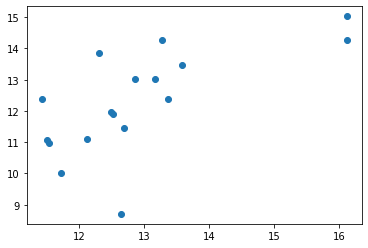

In [122]:
plt.scatter(y, model.predict(scaler.transform(X)))

# polished vs unpolished surface visualization

In [1]:
%load_ext autoreload
%autoreload 2
%reset -f
from imports import *

In [2]:
polished_data = joblib.load("/home/ben_rasoolov/additive_project/data/experiment_03/Polished_V03_T1_Left(Bottom)_500X_3D.info")

In [3]:
asbuilt_data = joblib.load("/home/ben_rasoolov/additive_project/data/experiment_03/V03_T1_Left(Bottom)_500X_3D.info")

In [4]:
polished_im = np.array(polished_data['value'].x)
asbuilt_im = np.array(asbuilt_data['value'].x)

In [5]:
polished_im.shape, asbuilt_im.shape

((6844, 7711), (6938, 7692))

In [6]:
d = 100
t = 50
a_pol = polished_im[2000:-2000, 2000:-2000]
a_pol -= a_pol.mean()
w, h = a_pol.shape
a_asb  = asbuilt_im[2000+t:2000+t+w, 2000+d:2000+d+h]
a_asb -= a_asb.mean()

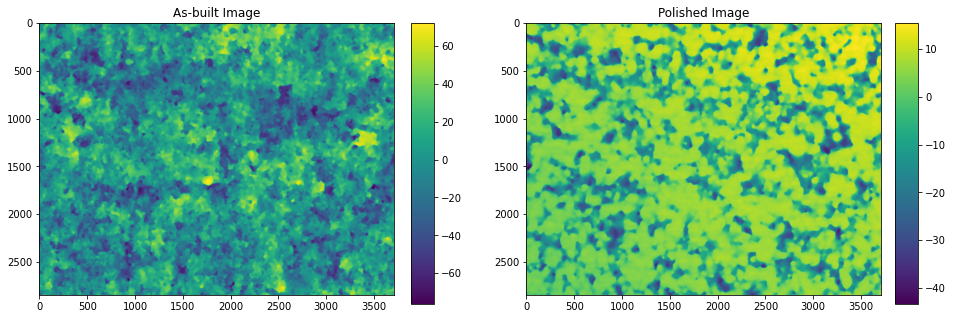

In [67]:
%matplotlib inline
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
axes = axes.reshape(-1)
c = axes[1].imshow(a_pol, cmap='jet')
axes[1].set_title('Polished Image')
cax = fig.add_axes([0.89, 0.1, 0.02, 0.78])
fig.colorbar(c, cax=cax)
c = axes[0].imshow(a_asb, cmap='jet')
axes[0].set_title('As-built Image')
cax = fig.add_axes([0.47, 0.1, 0.02, 0.78])
fig.colorbar(c, cax=cax)
plt.savefig("/home/ben_rasoolov/additive_project/data/paper/figures/asbuilt_vs_polished_2d.png", dpi=300)

In [8]:
def min_max_scale(x, a=0, b=1):
    mn, mx = x.min(), x.max()
    rng = b - a
    out = (x - mn)/(mx-mn)
    return out * rng + a

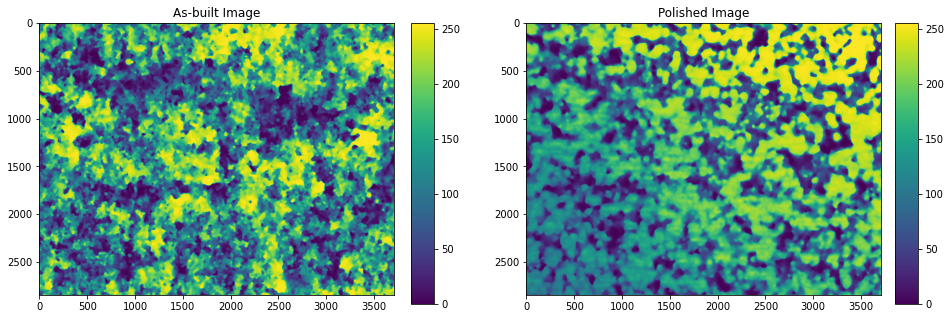

In [68]:
a_pol_equalized = cv2.equalizeHist(min_max_scale(a_pol, 0, 255).astype('uint8'))
# a_pol_equalized = min_max_scale(a_pol_equalized, 0, a_pol.max()-a_pol.min())
a_asb_equalized = cv2.equalizeHist(min_max_scale(a_asb, 0, 255).astype('uint8'))
# a_asb_equalized = min_max_scale(a_asb_equalized, 0, a_asb.max()-a_asb.min())
%matplotlib inline
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
axes = axes.reshape(-1)
c = axes[1].imshow(a_pol_equalized)
axes[1].set_title('Polished Image')
cax = fig.add_axes([0.89, 0.1, 0.02, 0.78])
fig.colorbar(c, cax=cax)
c = axes[0].imshow(a_asb_equalized)
axes[0].set_title('As-built Image')
cax = fig.add_axes([0.47, 0.1, 0.02, 0.78])
fig.colorbar(c, cax=cax)
#plt.savefig("/home/ben_rasoolov/additive_project/data/paper/figures/asbuilt_vs_polished_2d.png", dpi=300)

In [70]:
from scipy.stats import mode
from additive.feature_functions import feature_functions_functions as feat_funs
def image_stats(x):
    funs = {k: v for k, v in feat_funs.items() if '_2d' in k}
    return compute({k: delayed(v)(x) for k, v in funs.items()})[0]

In [71]:
image_stats(a_pol), image_stats(a_asb)

({'ra_2d': 7.9348383,
  'rq_2d': 9.909723,
  'rp_2d': 15.458671,
  'rv_2d': 43.33512,
  'rsk_2d': -1.160044018531971,
  'rku_2d': 3.6342245470620482,
  'mode_2d': 7.0},
 {'ra_2d': 18.053083,
  'rq_2d': 22.491354,
  'rp_2d': 72.2355,
  'rv_2d': 76.20617,
  'rsk_2d': -0.12702182479337154,
  'rku_2d': 2.798468140554855,
  'mode_2d': 3.0})

In [72]:
image_stats(a_pol_equalized), image_stats(a_asb_equalized)

({'ra_2d': 64.3602491959488,
  'rq_2d': 74.13747509255109,
  'rp_2d': 126.21494484978516,
  'rv_2d': 128.78505515021484,
  'rsk_2d': -0.01622937017480912,
  'rku_2d': 1.7819690858167678,
  'mode_2d': 58.0},
 {'ra_2d': 63.75106623742168,
  'rq_2d': 73.62104996442443,
  'rp_2d': 126.52297830868127,
  'rv_2d': 128.47702169131873,
  'rsk_2d': -0.01323404393625666,
  'rku_2d': 1.8001987190128763,
  'mode_2d': 9.0})

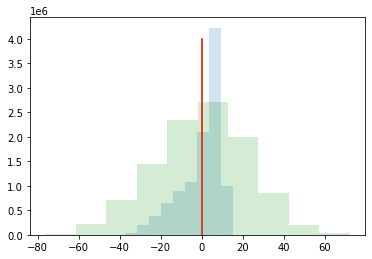

In [66]:
plt.hist(a_pol.reshape(-1), alpha=.2)
plt.plot([a_pol.mean(), a_pol.mean()], [0, 4e6])
plt.hist(a_asb.reshape(-1), alpha=.2)
plt.plot([a_asb.mean(), a_pol.mean()], [0, 4e6])

(array([1014412., 1039323., 1081541., 1031140., 1056441., 1004794.,
        1122009., 1006041., 1124585., 1073798.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

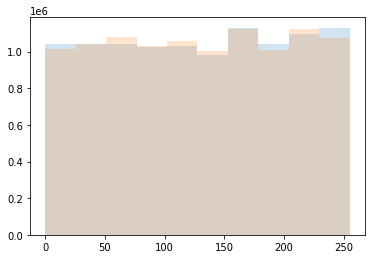

In [69]:
plt.hist(a_pol_equalized.reshape(-1), alpha=.2)
plt.hist(a_asb_equalized.reshape(-1), alpha=.2)

# polished vs unpolished surface visualization

In [60]:
%load_ext autoreload
%autoreload 2
%reset -f
from imports import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
polished_data = joblib.load("../data/experiment_03/Polished_V03_T1_Left(Bottom)_500X_3D.info")

In [63]:
asbuilt_data = joblib.load("../data/experiment_03/V03_T1_Left(Bottom)_500X_3D.info")

In [72]:
polished_im = np.array(polished_data['value'].x)
asbuilt_im = np.array(asbuilt_data)

In [73]:
polished_im.shape, asbuilt_im.shape

((6844, 7711), (6939, 7692))

In [74]:
d = 100
t = 50
a_pol = polished_im[2000:-2000, 2000:-2000]
a_pol -= a_pol.mean()
w, h = a_pol.shape
a_asb  = asbuilt_im[2000+t:2000+t+w, 2000+d:2000+d+h]
a_asb -= a_asb.mean()

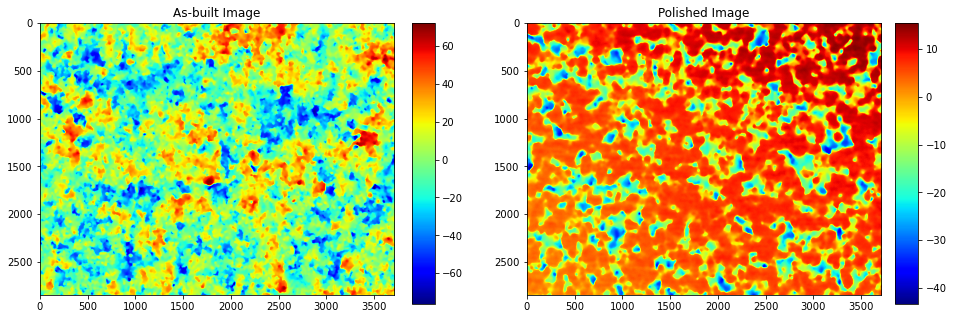

In [76]:
%matplotlib inline
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
axes = axes.reshape(-1)
c = axes[1].imshow(a_pol, cmap='jet')
axes[1].set_title('Polished Image')
cax = fig.add_axes([0.89, 0.1, 0.02, 0.78])
fig.colorbar(c, cax=cax)
c = axes[0].imshow(a_asb, cmap='jet')
axes[0].set_title('As-built Image')
cax = fig.add_axes([0.47, 0.1, 0.02, 0.78])
fig.colorbar(c, cax=cax)
plt.savefig("../data/paper/figures/asbuilt_vs_polished_2d.png", dpi=300)

In [77]:
from additive.experimental import plot_3d_surface

<IPython.core.display.Javascript object>


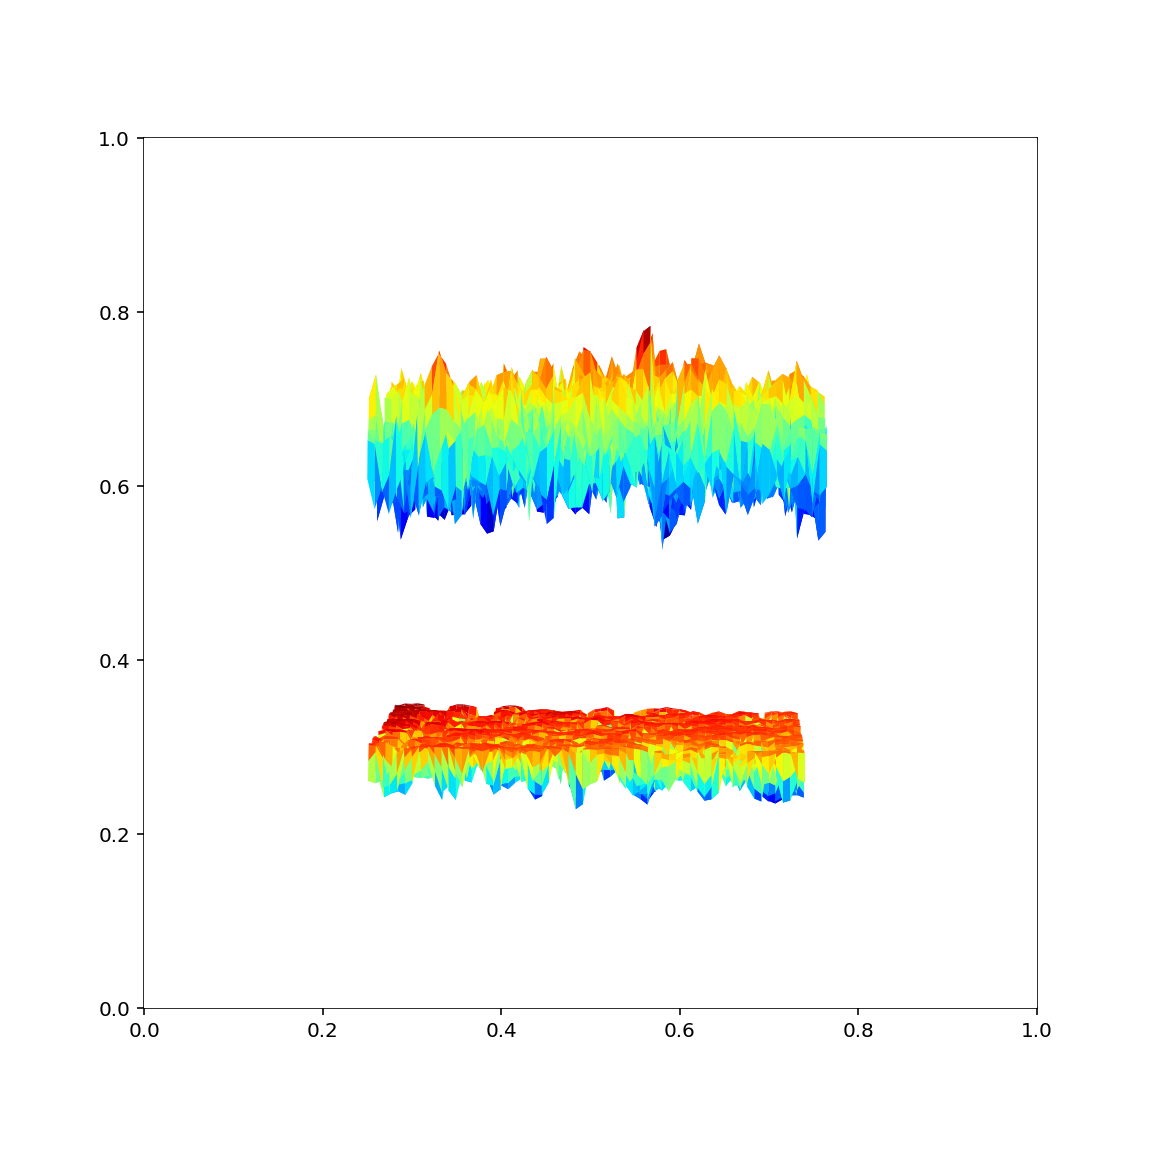

/home/bzr0014/miniconda3/envs/additive/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  This is separate from the ipykernel package so we can avoid doing imports until


In [81]:
%matplotlib notebook
fig, axes = plt.subplots(figsize=(8, 8))
ax = fig.gca(projection='3d')
plot_3d_surface(polished_im[2000:-2000, 2000:-2000], step=30, ax=ax, cmap='jet')
plot_3d_surface(asbuilt_im[2000+t:-2000+t, 2000+d:-2000+d]+200, step=30, ax=ax, cmap='jet')

In [78]:
plt.savefig("/home/ben_rasoolov/additive_project/data/paper/figures/asbuilt_vs_polished_3d.png", dpi=300)

# image comparison before and after tilt

In [26]:
%reset -f
%load_ext autoreload
%autoreload 2
from imports import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
data = joblib.load("../data/experiment_03/V01_T2_Left(Bottom)_500X_3D.info")
image = np.array(data['value'].x)

In [31]:
from scipy.ndimage import rotate

In [32]:
angle = 1.5
rotated = rotate(image, -angle)

In [33]:
double_rotated = rotate(rotated, angle)

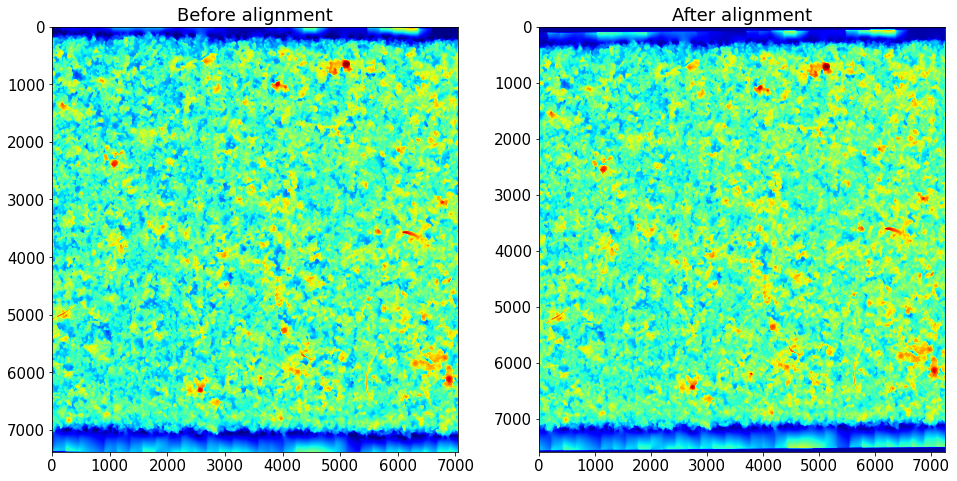

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(16, 10))

axes[0].imshow(rotated[150:-180, 500:-500], cmap='jet')
axes[1].imshow(double_rotated[150:-180, 500:-500], cmap='jet')

axes[0].set_title("Before alignment")
axes[1].set_title("After alignment")
plt.savefig("../data/paper/figures/before_after_alignment.png", dpi=300)

In [155]:
%reset -f
%load_ext autoreload
%autoreload 2
from imports import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [164]:
from additive.preprocessing import load_and_process_image
data = joblib.load("/home/ben_rasoolov/additive_project/data/experiment_03/Polished_V17_T1_Left(Bottom)_500X_3D.info")
image = load_and_process_image(np.array(data['value'].x), crop_size=[1000, 300])
image.shape

[ 4.24200258e-03  5.02962525e-04 -6.69237197e-07  6.97323158e-08]


(4708, 7164)

In [165]:
from scipy.stats import mode
modes = mode(image, axis=1)
print(mode(image.reshape(-1)))
print(modes.mode.mean())

ModeResult(mode=array([63.40149692]), count=array([1]))
77.52556115523079


In [168]:
image.mean()

111.23551867914627

In [166]:
from additive.preprocessing import load_and_process_image
data2 = joblib.load("/home/ben_rasoolov/additive_project/data/experiment_03/V17_T1_Left(Bottom)_500X_3D.info")
image2 = load_and_process_image(np.array(data2['value'].x), crop_size=[1000, 300])
image2.shape

[ 4.73096181e-03  3.18209739e-03 -3.68233728e-07 -1.43032627e-07]


(5270, 7133)

In [167]:
modes2 = mode(image2, axis=1)
print(mode(image2.reshape(-1)))
print(modes2.mode.mean())

ModeResult(mode=array([63.40149692]), count=array([1]))
77.52556115523079


In [170]:
image2.mean()

134.20637609212093

# Finding alternate measures instead of rv

In [264]:
%load_ext autoreload
%autoreload 2
%reset -f
import numpy as np
import joblib
import glob
from imports import *
from additive.feature_functions import feature_functions_functions as feature_funs
from additive.features import Features
from additive.preprocessing import load_and_process_image
from functools import reduce
from operator import or_

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [265]:
def isin(values, text, ignore_case=False):
    if ignore_case:
        return reduce(or_, [v.lower() in text.lower() for v in values])
    return reduce(or_, [v in text for v in values])

In [266]:
################### ################### ################### ###################
## version 1: all files
files = glob.glob("/home/ben_rasoolov/additive_project/data/experiment_03/*info")
chosen_files = [f for f in files if isin(['v18', 'v12', 'v14', 'v13', 'v11', 'v17'], f, ignore_case=True)]
print(len(chosen_files))
## version 2: v19 repeated measurements
################### ################### ################### ###################
#info_files = glob.glob("/home/ben_rasoolov/additive_project/data/experiment_03//*_2.info")
#chosen_files = info_files + [x.replace("_2", "") for x in info_files]
#len(chosen_files)

36


In [267]:
def get_features(img, features=None):
    if features is None:
        return {feature: fun(img) for feature, fun in feature_funs.items()}
    return {feature: fun(img) for feature, fun in feature_funs.items() if feature in features}

In [268]:
from multiprocessing import Pool
import dask
def get_features_from_files(chosen_files, n_procs=8):
    images = bag.from_sequence(chosen_files)
    preprocessed_images = images.map(load_and_process_image,
                                 transform_fun=lambda data: np.array(data['value'].x), crop_size=(1000, 1000))
    features = preprocessed_images.map(get_features, features=['mode_1d', 'mode_2d'])
    with Pool(min(len(chosen_files), n_procs)) as p:
        with dask.config.set(pool=p):
            out = features.compute()
    return out

In [269]:
out = get_features_from_files(chosen_files)

[-1.84533448e-03 -1.27956283e-03 -4.12078325e-08  4.52750129e-07]
[-8.24888035e-03  1.00893437e-04  1.61808121e-06  2.66632992e-08]
[ 6.39308151e-03  9.64994346e-04 -1.61631966e-06  2.64438613e-07]
[ 5.10678881e-03  5.53814916e-03 -1.32255078e-06 -7.09115455e-07]
[ 3.24635158e-05  2.59171675e-03 -1.36681455e-07 -1.31693280e-07]
[ 2.51441074e-03  3.02209347e-04 -5.80143911e-07  2.14329337e-07]
[ 1.23607882e-02  3.53808873e-04 -2.45074666e-06  1.70360176e-07]
[ 6.71770003e-03  8.55413852e-04 -7.95545896e-07  9.61246166e-08]
[ 5.99869710e-03  6.95888174e-04 -7.32616226e-07 -1.09445230e-07]
[ 1.64123615e-03 -4.81552039e-04 -5.52474804e-08  6.06446915e-07]
[ 8.50691820e-03  9.23481048e-05 -6.66033235e-07  1.55589464e-07]
[-5.26252185e-03 -9.54362747e-04  8.90394090e-07 -2.55008535e-07]
[-5.62704148e-04  4.70625311e-03 -2.46238812e-07 -3.30174275e-07]
[ 4.51812087e-03  9.04602374e-04 -7.14998299e-07 -2.27230614e-08]
[ 6.44893670e-03  2.29792359e-03 -7.18796178e-07  7.39273938e-08]
[ 6.805796

In [270]:
import pandas as pd
from additive.utility import get_file_info
df = pd.DataFrame(dict(zip(chosen_files, out))).T
df.index = df.index.map(lambda x: x.split("/")[-1].split(".")[0]).rename("file")
df = df.reset_index()
df = get_file_info(df['file']).join(df)
df

ispolished specimen   T RL                                  file  \
0        False      V17  T2  R             V17_T2_Right(Top)_500X_3D   
1        False      V13  T1  L           V13_T1_Left(Bottom)_500X_3D   
2         True      V11  T1  L  Polished_V11_T1_Left(Bottom)_500X_3D   
3        False      V11  T2  R             V11_T2_Right(Top)_500X_3D   
4        False      V12  T1  R             V12_T1_Right(Top)_500X_3D   
5        False      V17  T2  L           V17_T2_Left(Bottom)_500X_3D   
6        False      V14  T2  L           V14_T2_Left(Bottom)_500X_3D   
7        False      V13  T2  R             V13_T2_Right(Top)_500X_3D   
8        False      V18  T2  L           V18_T2_Left(Bottom)_500X_3D   
9         True      V11  T1  R    Polished_V11_T1_Right(Top)_500X_3D   
10       False      V13  T1  R             V13_T1_Right(Top)_500X_3D   
11       False      V14  T1  L           V14_T1_Left(Bottom)_500X_3D   
12       False      V18  T2  R             V18_T2_Right(Top)_500X_3D   
13       False      V11  T2  L           V11_T2_Left(Bottom)_500X_3D   
14        True      V17  T1  L  Polished_V17_T1_Left(Bottom)_500X_3D   
15        True      V11  T2  R    Polished_V11_T2_Right(Top)_500X_3D   
16        True      V11  T2  L  Polished_V11_T2_Left(Bottom)_500X_3D   
17       False      V17  T1  R             V17_T1_Right(Top)_500X_3D   
18        True      V13  T1  R    Polished_V13_T1_Right(Top)_500X_3D   
19       False      V11  T1  L           V11_T1_Left(Bottom)_500X_3D   
20       False      V11  T1  R             V11_T1_Right(Top)_500X_3D   
21       False      V12  T2  R             V12_T2_Right(Top)_500X_3D   
22       False      V14  T1  R             V14_T1_Right(Top)_500X_3D   
23       False      V12  T1  L           V12_T1_Left(Bottom)_500X_3D   
24        True      V17  T2  L  Polished_V17_T2_Left(Bottom)_500X_3D   
25       False      V17  T1  L           V17_T1_Left(Bottom)_500X_3D   
26       False      V18  T1  R             V18_T1_Right(Top)_500X_3D   
27       False      V12  T2  L           V12_T2_Left(Bottom)_500X_3D   
28        True      V17  T1  R    Polished_V17_T1_Right(Top)_500X_3D   
29        True      V13  T2  L  Polished_V13_T2_Left(Bottom)_500X_3D   
30        True      V13  T1  L  Polished_V13_T1_Left(Bottom)_500X_3D   
31       False      V13  T2  L           V13_T2_Left(Bottom)_500X_3D   
32        True      V13  T2  R    Polished_V13_T2_Right(Top)_500X_3D   
33        True      V17  T2  R    Polished_V17_T2_Right(Top)_500X_3D   
34       False      V14  T2  R             V14_T2_Right(Top)_500X_3D   
35       False      V18  T1  L           V18_T1_Left(Bottom)_500X_3D   

      mode_1d  mode_2d  
0    2.614834      1.0  
1   -0.824901     -3.0  
2    3.644151      3.0  
3    0.680842      4.0  
4    1.686387      1.0  
5    1.876017      1.0  
6   -6.945461     -8.0  
7    9.703917     10.0  
8    2.239669     -5.0  
9    5.197160      5.0  
10  -0.450307      2.0  
11  -1.882596     -3.0  
12   3.942809    -11.0  
13   1.373035      5.0  
14   7.673534     16.0  
15   7.300348      7.0  
16   7.400737      8.0  
17   1.115155      0.0  
18  13.472081     14.0  
19  -0.445094      1.0  
20  -3.276441      2.0  
21   0.882377      2.0  
22  -1.255964     -2.0  
23   1.010206      4.0  
24  15.587376     17.0  
25   2.741746      1.0  
26   1.988014     -4.0  
27   2.044061      7.0  
28  13.476657     17.0  
29  14.208404     15.0  
30  11.527866     12.0  
31  14.208404     15.0  
32   9.703917     10.0  
33  18.612027     21.0  
34  -5.391444     -4.0  
35   1.451263      0.0

In [275]:
# orig = pd.read_csv("/home/ben_rasoolov/additive_project/data/paper/data/global_stats_tilted_rotated_cropped_v04.csv")
# df4 = orig.drop(['mode_1d', 'mode_2d'], axis=1).merge(df, on=['ispolished', 'specimen', 'T', 'RL'])
# df4.to_csv("/home/ben_rasoolov/additive_project/data/paper/data/global_stats_tilted_rotated_cropped_v04.csv", index=False)

In [557]:
orig[orig.ispolished & orig['specimen'].isin({'V11', 'V13', 'V17'})].groupby(['specimen']).max()

ispolished   T RL                              file_x      ra_1d  \
specimen                                                                     
V11             True  T2  R  Polished_V11_T2_Right(Top)_500X_3D   7.958603   
V13             True  T2  R  Polished_V13_T2_Right(Top)_500X_3D  13.283742   
V17             True  T2  R  Polished_V17_T2_Right(Top)_500X_3D  13.642760   

              rq_1d    rsk_1d    rku_1d      rp_1d      rv_1d      ra_2d  \
specimen                                                                   
V11        9.857359 -1.368657  7.491663  10.520284  36.089186   8.072428   
V13       15.626065 -0.751848  4.620403  17.205495  46.826339  13.412949   
V17       16.134591 -0.212123  2.727019  22.267575  45.397845  13.802137   

              rq_2d      rp_2d      rv_2d    rsk_2d    rku_2d  \
specimen                                                        
V11       10.150749  39.829623  67.529944 -1.225809  6.331805   
V13       15.919650  21.471980  72.756115 -0.710786  4.410962   
V17       16.466252  77.231297  62.059206 -0.202740  2.757794   

                                      file_y    mode_1d  mode_2d  
specimen                                                          
V11       Polished_V11_T2_Right(Top)_500X_3D   7.400737      8.0  
V13       Polished_V13_T2_Right(Top)_500X_3D  14.208404     15.0  
V17       Polished_V17_T2_Right(Top)_500X_3D  18.612027     21.0

In [558]:
orig = pd.read_csv("/home/ben_rasoolov/additive_project/data/paper/data/global_stats_tilted_rotated_cropped_v04.csv")
cols_to_drop = [x for x in orig.columns if x.endswith('_2d')] + ['file_x', 'file_y']
tmp = orig.drop(cols_to_drop, axis=1)

In [560]:
res = tmp[tmp['ispolished']].merge(tmp[~tmp['ispolished']], on=['specimen', 'T', 'RL'])\
    .drop(['ispolished_x', 'ispolished_y'], axis=1)
res

specimen   T RL    ra_1d_x    rq_1d_x  rsk_1d_x  rku_1d_x    rp_1d_x  \
0       V11  T1  L   4.527431   6.208072 -2.083207  7.491663   5.929927   
1       V11  T1  R   6.192697   7.930921 -1.656373  5.331377   7.676874   
2       V17  T1  L  10.498238  12.427238 -0.212123  2.207155  21.022304   
3       V11  T2  R   7.913196   9.857359 -1.438924  4.422782  10.449421   
4       V11  T2  L   7.958603   9.815106 -1.368657  4.341406  10.520284   
5       V13  T1  R  12.156369  14.046193 -0.751848  2.459677  16.153497   
6       V17  T2  L  11.992086  14.335027 -0.648876  2.727019  20.433179   
7       V17  T1  R  11.030199  12.974124 -0.353556  2.234523  19.664089   
8       V13  T2  L  13.283742  15.626065 -0.923787  2.826922  17.205495   
9       V13  T1  L  10.849642  12.911247 -1.011653  3.079410  13.918803   
10      V13  T2  R   9.673651  12.161879 -1.451079  4.620403  11.913197   
11      V17  T2  R  13.642760  16.134591 -0.527518  2.425814  22.267575   

      rv_1d_x  mode_1d_x    ra_1d_y    rq_1d_y  rsk_1d_y  rku_1d_y    rp_1d_y  \
0   28.451027   3.644151  19.792682  24.456594  0.231876  2.865466  72.894686   
1   31.480531   5.197160  20.674016  25.587523  0.351087  2.876343  75.648138   
2   33.709958   7.673534  16.047365  20.188340 -0.093679  2.992685  56.615596   
3   35.860442   7.300348  19.051853  23.286449  0.069212  2.556587  60.847256   
4   36.089186   7.400737  18.695940  22.990538  0.059173  2.640564  62.974622   
5   39.609140  13.472081  21.668242  26.974085  0.103231  2.875700  74.689298   
6   43.701991  15.587376  17.995050  22.312795 -0.019567  2.769843  58.561165   
7   34.625986  13.476657  16.407634  20.874124 -0.021723  3.171323  61.134055   
8   46.826339  14.208404  13.283742  15.626065 -0.923787  2.826922  17.205495   
9   39.674545  11.527866  21.104536  26.193603  0.032069  2.879431  70.324724   
10  45.538838   9.703917   9.673651  12.161879 -1.451079  4.620403  11.913197   
11  45.397845  18.612027  20.367282  25.141885 -0.043377  2.692481  66.080730   

      rv_1d_y  mode_1d_y  
0   56.415843  -0.445094  
1   55.552691  -3.276441  
2   55.442637   2.741746  
3   55.875495   0.680842  
4   55.797110   1.373035  
5   74.596831  -0.450307  
6   61.415199   1.876017  
7   58.394124   1.115155  
8   46.826339  14.208404  
9   74.886901  -0.824901  
10  45.538838   9.703917  
11  66.391047   2.614834

In [549]:
y_cols = cols = "ra_1d_y 	rq_1d_y 	rsk_1d_y 	rku_1d_y 	rp_1d_y 	rv_1d_y 	mode_1d_y rv_1d_y".split()
tmp = res[y_cols].drop(10)
tmp

ra_1d_x    rq_1d_x  rsk_1d_x  rku_1d_x    rp_1d_x    rv_1d_x  mode_1d_x  \
0    4.527431   6.208072 -2.083207  7.491663   5.929927  28.451027   3.644151   
1    6.192697   7.930921 -1.656373  5.331377   7.676874  31.480531   5.197160   
2   10.498238  12.427238 -0.212123  2.207155  21.022304  33.709958   7.673534   
3    7.913196   9.857359 -1.438924  4.422782  10.449421  35.860442   7.300348   
4    7.958603   9.815106 -1.368657  4.341406  10.520284  36.089186   7.400737   
5   12.156369  14.046193 -0.751848  2.459677  16.153497  39.609140  13.472081   
6   11.992086  14.335027 -0.648876  2.727019  20.433179  43.701991  15.587376   
7   11.030199  12.974124 -0.353556  2.234523  19.664089  34.625986  13.476657   
8   13.283742  15.626065 -0.923787  2.826922  17.205495  46.826339  14.208404   
9   10.849642  12.911247 -1.011653  3.079410  13.918803  39.674545  11.527866   
11  13.642760  16.134591 -0.527518  2.425814  22.267575  45.397845  18.612027   

      rv_1d_y  
0   56.415843  
1   55.552691  
2   55.442637  
3   55.875495  
4   55.797110  
5   74.596831  
6   61.415199  
7   58.394124  
8   46.826339  
9   74.886901  
11  66.391047

In [522]:
x_cols = 'ra_1d 	rq_1d 	rsk_1d 	rku_1d 	rp_1d mode_1d'.split()
y_cols = ['rv_1d']

In [524]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
x = tmp[x_cols].values
y = tmp[y_cols].values
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.2)

In [526]:
import tensorflow as tf
import tensorflow.keras as keras

In [533]:
model = keras.models.Sequential([
    keras.layers.Input([x.shape[-1]]),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dropout(.3),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(.3),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dropout(.3),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dropout(.3),
    keras.layers.Dense(1),
])
model.compile(optimizer='adam', loss='mse')
#model = MLPRegressor(2000, )

In [538]:
model.fit(xtrain, ytrain, epochs=10000, validation_split=.1, 
          callbacks=[keras.callbacks.EarlyStopping(patience=1000, restore_best_weights=True)])

Train on 25 samples, validate on 3 samples
Epoch 1/10000
25/25 [==============================] - 0s 1ms/sample - loss: 510.6593 - val_loss: 52.5871
Epoch 2/10000
25/25 [==============================] - 0s 846us/sample - loss: 449.4058 - val_loss: 41.2241
Epoch 3/10000
25/25 [==============================] - 0s 923us/sample - loss: 504.8893 - val_loss: 35.8391
Epoch 4/10000
25/25 [==============================] - 0s 702us/sample - loss: 536.8865 - val_loss: 46.7287
Epoch 5/10000
25/25 [==============================] - 0s 802us/sample - loss: 529.8238 - val_loss: 73.0024
Epoch 6/10000
25/25 [==============================] - 0s 487us/sample - loss: 467.7168 - val_loss: 106.1427
Epoch 7/10000
25/25 [==============================] - 0s 985us/sample - loss: 662.3195 - val_loss: 130.1503
Epoch 8/10000
25/25 [==============================] - 0s 936us/sample - loss: 560.9750 - val_loss: 141.4988
Epoch 9/10000
25/25 [==============================] - 0s 891us/sample - loss: 582.5856 - va

In [539]:
np.sqrt(((model.predict(xtrain) - ytrain)**2).sum())

53.407370327212

In [546]:
#np.sqrt(((model.predict(xtest) - ytest)**2).sum())
pd.DataFrame(np.concatenate([model.predict(xtest) , ytest], axis=1))

0          1
0  20.126032  28.451027
1  27.399759  35.860442
2  57.494453  56.415843
3  63.270092  65.618219
4  33.810261  45.538838
5  30.596041  33.709958
6  33.810261  45.538838
7  22.840353  31.480531

[115.] [115.]


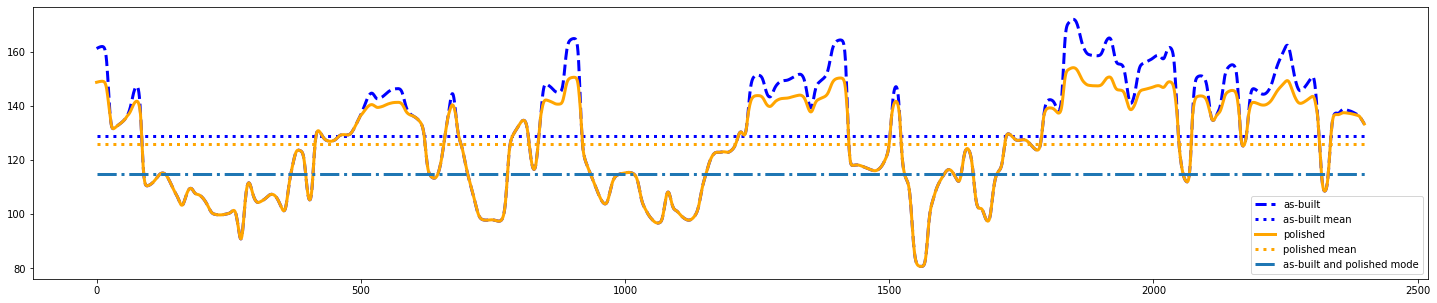

In [98]:
from scipy.stats import mode
fig, axes = plt.subplots(1, 1, figsize=(25, 5))
profile = image[3000][100:2500].copy()
plt.plot(profile, label="as-built", linewidth=3, linestyle='--', color='blue')
plt.plot([0, len(profile)], [profile.mean()]*2, label='as-built mean', linewidth=3, linestyle='dotted', color='blue')
mode1 = mode(profile[profile<profile.mean()].round(decimals=0)).mode
q3 = np.percentile(profile, 60)
cond = profile>q3
profile[cond] = q3 +(profile[cond] - q3)*.5
plt.plot(profile, label='polished', linewidth=3, color='orange')
plt.plot([0, len(profile)], [profile.mean()]*2, label='polished mean', linewidth=3, linestyle='dotted', color='orange')
#mode2 = mode(profile[~cond].round(decimals=0)).mode
mode2 = mode(profile[profile<profile.mean()].round(decimals=0)).mode
print(mode1, mode2)
plt.plot([0, len(profile)], [mode1]*2, label="as-built and polished mode", linewidth=3, linestyle='-.')
plt.legend()
plt.savefig("/home/ben_rasoolov/additive_project/data/paper/figures/mode_vs_mean.png", dpi=300)

In [277]:
%load_ext autoreload
%autoreload 2
%reset -f
import numpy as np
import joblib
import glob
from imports import *
from additive.feature_functions import feature_functions_functions as feature_funs
from additive.features import Features
from additive.preprocessing import load_and_process_image
from functools import reduce
from operator import or_

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [278]:
data_polished = joblib.load("/home/ben_rasoolov/additive_project/data/experiment_03/Polished_V15_T1_Left(Bottom)_500X_3D.info")

In [279]:
x_polished = np.array(data_polished['value'].x)[1000:-1000, 1000:-1000].round(decimals=0)

In [280]:
from scipy.stats import mode

In [281]:
modes = mode(x_polished)
mode_polished = modes.mode.mean() - x_polished.mean()
#mode_polished = (np.percentile(x_polished, 90, axis=1)-x_polished.mean(axis=1)).mean()
rv_polished = (x_polished.min(axis=1)-x_polished.mean(axis=1)).mean()

In [282]:
data_asbuilt = joblib.load("/home/ben_rasoolov/additive_project/data/experiment_03/V15_T1_Left(Bottom)_500X_3D.info")

In [283]:
x_asbuilt = np.array(data_asbuilt['value'].x)[1000:-1000, 1000:-1000].round(decimals=0)

In [284]:
modes = mode(x_asbuilt)
mode_asbuilt = modes.mode.mean() - x_asbuilt.mean()
#mode_asbuilt = (np.percentile(x_asbuilt, 90, axis=1)-x_asbuilt.mean(axis=1)).mean()

In [285]:
rv_asbuilt = (x_asbuilt.min(axis=1)-x_asbuilt.mean(axis=1)).mean()

In [286]:
rku_polished = feature_funs['rku_2d'](x_polished)
rku_asbuilt = feature_funs['rku_2d'](x_asbuilt)

In [287]:
rku_asbuilt, rku_polished

(3.70802406706433, 2.526385836324556)

In [288]:
mode_asbuilt, mode_polished

(-0.023651123, 12.448959)

In [289]:
rv_asbuilt, rv_polished

(-64.23692, -35.417976)

In [290]:
rv_asbuilt-rku_asbuilt*mode_asbuilt, rv_polished-rku_polished*mode_polished

(-64.14922428430252, -66.86885095969498)

In [291]:
rv_asbuilt/x_asbuilt.std(), rv_polished/x_polished.std()

(-2.6432981, -2.7193294)

In [292]:
mode1 = mode(x_polished).mode.mean()
mu1 = x_polished.mean()

In [293]:
mode2 = mode(x_asbuilt).mode.mean()
mu2 = x_asbuilt.mean()

In [294]:
x1 = (x_polished.reshape(-1)-x_polished.mean())/x_polished.std()
x2 = (x_asbuilt.reshape(-1)-x_asbuilt.mean())/x_asbuilt.std()

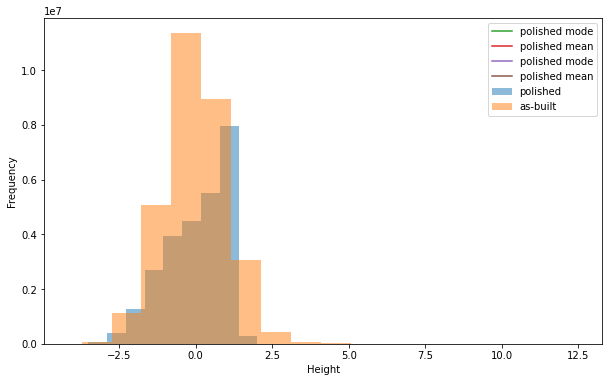

In [295]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(x1, alpha=.5, label='polished', density=False)
ax.hist(x2, alpha=.5, label='as-built', density=False)
ax.plot([mode1-mu1, mode1-mu1], [0, .025], label='polished mode')
ax.plot([0, 0], [0, .025], label='polished mean')
ax.plot([mode2-mu2, mode2-mu2], [0, .025], label='polished mode')
ax.plot([0, 0], [0, .025], label='polished mean')
ax.set_xlabel('Height')
ax.set_ylabel('Frequency')
ax.legend()

In [299]:
def get_stats(x):
    functions = [np.mean, np.median, lambda x: mode(x).mode.mean()]
    return compute(delayed(f)(x) for f in functions)

In [300]:
get_stats(x_asbuilt)

([153.60017, 154.0, 153.57652],)

In [301]:
get_stats(x_polished)

([143.70636, 146.0, 156.15532],)

In [41]:
500*20

10000

# before and after polshed comparison

In [1]:
%load_ext autoreload
%autoreload 2
%reset -f
from imports import *
# df = pd.read_csv("/home/ben_rasoolov/additive_project/data/paper/data/global_stats_equalize_hist_v02.csv")

In [2]:
box_files = {
    "morePolished_V07_T1_Left(Bottom)_500X_3D.csv": 'https://auburn.box.com/shared/static/fmdgsitx225kiz856uzmmdxlo30pepyi.csv',
    "morePolished_V07_T1_Right(Top)_500X_3D.csv": "https://auburn.box.com/shared/static/xgoav7ttot5kgsgoul1ee2p5cy5vuct9.csv",
    "morePolished_V07_T2_Right(Top)_500X_3D.csv": "https://auburn.box.com/shared/static/7t3g815aioj4zwkzl33jx1tsivvd8cm6.csv",
    "morePolished_V07_T2_Left(Bottom)_500X_3D.csv": "https://auburn.box.com/shared/static/cy4ny0h4kzs1322htsfh7y35h78rd7uu.csv",
}

In [4]:
from additive.utility import download_from_dict

In [5]:
# download_from_dict(box_files, "/home/ben_rasoolov/additive_project/data/original_images/")

In [7]:
files = glob.glob("/data/additive_project/data/original_images/morePolished_*csv")
files

[]

In [14]:
from additive.utility import extract_array_from_csv

In [15]:
with Pool(4) as p:
    out = p.map(extract_array_from_csv, files)

/home/ben_rasoolov/additive_project/data/original_images/morePolished_V07_T1_Right(Top)_500X_3D.csv/home/ben_rasoolov/additive_project/data/original_images/morePolished_V07_T2_Right(Top)_500X_3D.csv/home/ben_rasoolov/additive_project/data/original_images/morePolished_V07_T1_Left(Bottom)_500X_3D.csv/home/ben_rasoolov/additive_project/data/original_images/morePolished_V07_T2_Left(Bottom)_500X_3D.csv    /home/ben_rasoolov/additive_project/data/original_images/morePolished_V07_T1_Right(Top)_500X_3D.pd/home/ben_rasoolov/additive_project/data/original_images/morePolished_V07_T1_Left(Bottom)_500X_3D.pd/home/ben_rasoolov/additive_project/data/original_images/morePolished_V07_T2_Left(Bottom)_500X_3D.pd/home/ben_rasoolov/additive_project/data/original_images/morePolished_V07_T2_Right(Top)_500X_3D.pd



file /home/ben_rasoolov/additive_project/data/original_images/morePolished_V07_T2_Left(Bottom)_500X_3D.pd existsfile /home/ben_rasoolov/additive_project/data/original_images/morePolished_V07_T2_Ri

In [22]:
from additive.utility import image_rescale
images_d = image_rescale(files)
with Pool(4) as p:
    with dask.config.set(pool=p):
        images = images_d.compute()

In [6]:
files = glob.glob("/home/ben_rasoolov/additive_project/data/original_images/morePolished_*pd")
files

[]

In [4]:
from additive.utility import dfe
from collections import namedtuple
ImageInfo = namedtuple("ImageInfo", "x")
root = "/home/ben_rasoolov/additive_project/data/experiment_04/"
for file, image in zip(files, images):
    d, f, e = dfe(file)
    new_path = root + f + ".info"
    joblib.dump({'value': ImageInfo(image)}, new_path)

NameError: name 'images' is not defined

In [1]:
%load_ext autoreload
%autoreload 2
%reset -f
from imports import *
from additive.features import ImageInfo, Features
# df = pd.read_csv("/home/ben_rasoolov/additive_project/data/paper/data/global_stats_equalize_hist_v02.csv")

In [2]:
files = glob.glob("../data/experiment_04/*info")
files

['../data/experiment_04/Polished_V07_T2_Left(Bottom)_500X_3D.info',
 '../data/experiment_04/V07_T2_Left(Bottom)_500X_3D.info',
 '../data/experiment_04/Polished_V07_T1_Left(Bottom)_500X_3D.info',
 '../data/experiment_04/morePolished_V07_T2_Right(Top)_500X_3D.info',
 '../data/experiment_04/morePolished_V07_T1_Right(Top)_500X_3D.info',
 '../data/experiment_04/V07_T2_Right(Top)_500X_3D.info',
 '../data/experiment_04/morePolished_V07_T1_Left(Bottom)_500X_3D.info',
 '../data/experiment_04/Polished_V07_T1_Right(Top)_500X_3D.info',
 '../data/experiment_04/Polished_V07_T2_Right(Top)_500X_3D.info',
 '../data/experiment_04/V07_T1_Left(Bottom)_500X_3D.info',
 '../data/experiment_04/V07_T1_Right(Top)_500X_3D.info',
 '../data/experiment_04/morePolished_V07_T2_Left(Bottom)_500X_3D.info']

In [3]:
ImageInfo = namedtuple("ImageInfo", "x")
def load_images(x):
    return joblib.load(x)['value'].x
with Pool(6) as p:
    images = p.map(load_images, files)

In [8]:
from scipy.stats import mode
from additive.feature_functions import feature_functions_functions as feat_funs
def image_stats(x):
    funs = {k: v for k, v in feat_funs.items()}
    return compute({k: delayed(v)(x) for k, v in funs.items()})[0]

In [10]:
res = [image_stats(x[500:-500, 500:-500]) for x in images]

/home/bzr0014/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [11]:
pd.DataFrame(res).assign(file=[x.split("/")[-1] for x in files])

mean      median    mode_1d  mode_2d      ra_1d      ra_2d  \
0   156.758153  157.102081   5.561661      1.0  11.502046  11.717911   
1   177.753221  176.877884  -1.046246      0.0  16.938068  17.407897   
2   139.529167  139.704361  12.641944     -3.0  10.867956  12.931453   
3    60.857285   63.192513   9.783106     10.0   9.128609   9.417842   
4   105.283836  106.990700   8.583746      9.0   9.028659   9.860147   
5   175.856914  175.445374  -0.104093      2.0  16.561858  16.928977   
6   107.514587  109.312920   8.716775      7.0   8.077580   8.864080   
7   209.922447  210.362076   9.028795     -4.0  11.447176  13.238714   
8   142.472852  142.998444  15.344728     17.0  11.615823  11.816400   
9   188.420467  186.360641  -8.037486     -8.0  15.730038  16.745289   
10  195.918021  195.041656  -2.380284     -2.0  16.833730  17.447291   
11   72.049713   73.947533   5.619812      6.0   9.358821   9.677210   

      rku_1d    rku_2d      rp_1d       rp_2d      rq_1d      rq_2d    rsk_1d  \
0   2.451453  2.461532  25.957439   32.933853  13.820404  14.205364 -0.268579   
1   2.811959  2.843771  62.528289  102.751663  20.925889  21.528677  0.243769   
2   2.436490  2.384222  20.214056   33.796738  12.797262  15.570337 -0.350016   
3   2.881590  2.804885  16.401426   53.317192  10.920797  11.324412 -0.774356   
4   2.889716  2.829913  16.849340   45.957909  10.913875  11.982503 -0.736547   
5   2.727582  2.825149  58.995701   92.713425  20.378586  20.894308  0.202108   
6   2.963711  2.888977  13.474958   29.617126   9.689466  10.841835 -0.845382   
7   2.333169  2.438858  22.785887   33.664825  13.610626  15.987694 -0.300627   
8   2.334556  2.267206  20.377383   27.051926  13.624758  14.048216 -0.420209   
9   2.764421  2.937672  58.986943   90.020844  19.215461  20.707703  0.407426   
10  2.685036  2.933086  60.320321  109.982101  20.554394  21.521875  0.248873   
11  2.923517  2.896443  19.524122   30.159767  11.544605  11.934641 -0.640460   

      rsk_2d      rv_1d      rv_2d  \
0  -0.167344  38.065586  60.757141   
1   0.282603  48.555349  73.362480   
2  -0.156459  33.894557  56.214226   
3  -0.674009  33.891792  55.907990   
4  -0.601301  33.398396  51.212940   
5   0.218359  47.285596  71.145241   
6  -0.648006  30.247091  47.639889   
7  -0.218173  36.185216  61.481110   
8  -0.272663  36.811993  55.686913   
9   0.434259  40.525698  63.158852   
10  0.274079  45.604422  86.227158   
11 -0.568536  35.442917  56.031059   

                                             file  
0       Polished_V07_T2_Left(Bottom)_500X_3D.info  
1                V07_T2_Left(Bottom)_500X_3D.info  
2       Polished_V07_T1_Left(Bottom)_500X_3D.info  
3     morePolished_V07_T2_Right(Top)_500X_3D.info  
4     morePolished_V07_T1_Right(Top)_500X_3D.info  
5                  V07_T2_Right(Top)_500X_3D.info  
6   morePolished_V07_T1_Left(Bottom)_500X_3D.info  
7         Polished_V07_T1_Right(Top)_500X_3D.info  
8         Polished_V07_T2_Right(Top)_500X_3D.info  
9                V07_T1_Left(Bottom)_500X_3D.info  
10                 V07_T1_Right(Top)_500X_3D.info  
11  morePolished_V07_T2_Left(Bottom)_500X_3D.info

In [12]:
def min_max_scale(x, a=0, b=1):
    mn, mx = x.min(), x.max()
    rng = b - a
    out = (x - mn)/(mx-mn)
    return out * rng + a

def get_equalized_stats(image):
    scaled_image = min_max_scale(image, 0, 255).astype('uint8')
    equalized_image = cv2.equalizeHist(scaled_image)
    return image_stats(equalized_image)

In [ ]:
equalized_res = compute([delayed(get_equalized_stats)(x[500:-500, 500:-500]) for x in images])[0]

In [144]:
pd.DataFrame(equalized_res).assign(file=[x.split("/")[-1] for x in files])[['rp_1d', 'rv_1d', 'mode_1d', 'file']]\
    .sort_values(['mode_1d'])

rp_1d       rv_1d    mode_1d  \
2   123.583894  123.813139 -23.175467   
5   123.965969  125.022068  -3.861222   
0   124.557950  127.246110   2.712053   
11  124.705182  126.749379   6.081373   
9   100.090600  122.329493  39.179011   
1   117.278745  126.911691  40.640307   
3   116.831014  127.172021  43.837700   
8    91.589925  120.132741  51.214514   
6   107.467249  125.723292  54.356838   
7    98.152255  125.258575  61.332935   
10  114.919440  127.394724  72.920990   
4   109.085200  126.866078  81.829393   

                                             file  
2                V07_T1_Left(Bottom)_500X_3D.info  
5                  V07_T1_Right(Top)_500X_3D.info  
0                V07_T2_Left(Bottom)_500X_3D.info  
11                 V07_T2_Right(Top)_500X_3D.info  
9         Polished_V07_T1_Right(Top)_500X_3D.info  
1   morePolished_V07_T2_Left(Bottom)_500X_3D.info  
3       Polished_V07_T2_Left(Bottom)_500X_3D.info  
8       Polished_V07_T1_Left(Bottom)_500X_3D.info  
6     morePolished_V07_T1_Right(Top)_500X_3D.info  
7   morePolished_V07_T1_Left(Bottom)_500X_3D.info  
10    morePolished_V07_T2_Right(Top)_500X_3D.info  
4         Polished_V07_T2_Right(Top)_500X_3D.info

In [4]:
dd = dict(zip([x.split("/")[-1] for x in files], images))

In [11]:
im1 = dd['V07_T1_Left(Bottom)_500X_3D.info']
im2 = dd['Polished_V07_T1_Left(Bottom)_500X_3D.info']
im3 = dd['morePolished_V07_T1_Left(Bottom)_500X_3D.info']
ims = [im1, im2, im3]
names = ['asbuilt', 'polished', 'more polished']
dxs = [-450, -430, -600]
dys = [650, 1620, 720]

(7269, 7725)
(7256, 7717)
(6854, 7711)


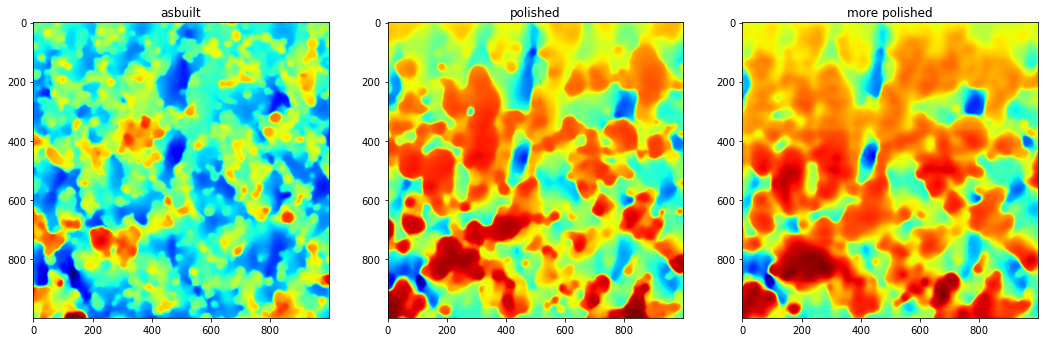

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sub_ims = []
for name, im, ax, dx, dy in zip(names, ims, axes, dxs, dys):
    print(im.shape)
    sub_im = im[1000+dx:2000+dx, 1000+dy:2000+dy]
    ax.imshow(sub_im, cmap='jet')
    sub_ims.append(sub_im)
    ax.set_title(name)
plt.savefig("../data/paper/figures/polishedVsHalfVsMorePolished3D.png", dpi=300)

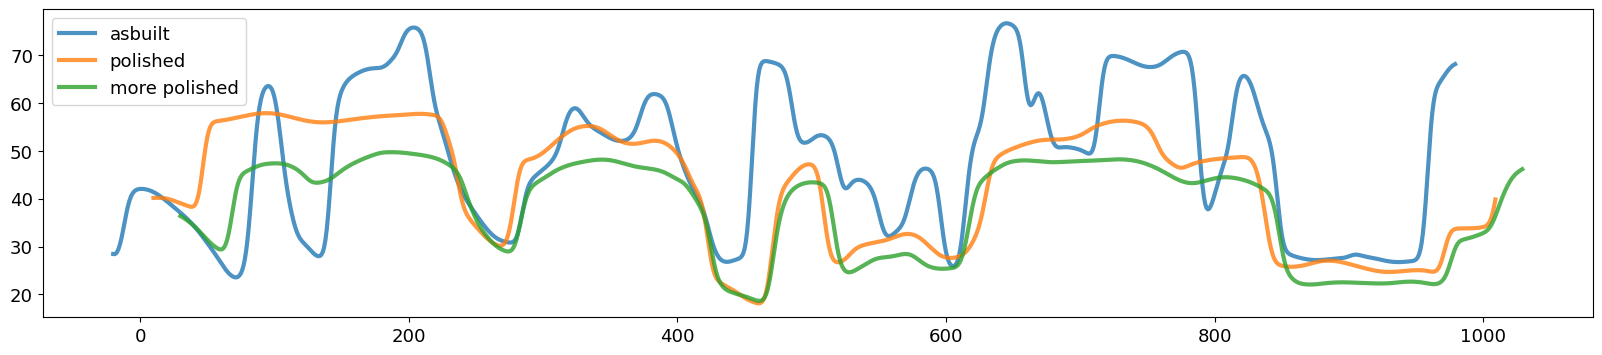

In [59]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
font = {'size'   : 13}
matplotlib.rc('font', **font)
fig, axes = plt.subplots(1, 1, figsize=(20, 4))
N = 1000
for name, sub_im, dx, dy in zip(names, sub_ims, [-20, 10, 30], [0, 45, 60]):
    x = np.arange(sub_im.shape[1])
    plt.plot(x+dx, sub_im[500]-sub_im.min(), label=name, linewidth=3, alpha=.8)
plt.legend(loc='upper left')
plt.savefig("../data/paper/figures/polishedVsHalfVsMorePolished.png", dpi=300)

In [275]:
from additive.experimental import get_best_template_match, get_top_left_best_template_match, equalize_hist

In [205]:
template = ims[0][1000:-1000, 1000:-1000]
out1 = get_best_template_match(ims[1], template, methods[1])
out2 = get_best_template_match(ims[2], template, methods[1])

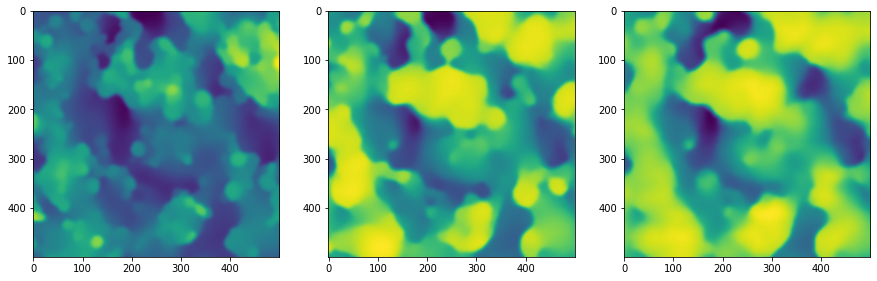

In [208]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
s = slice(1500, 2000)
axes[0].imshow(template[s,s])
axes[1].imshow(out1[s, s])
axes[2].imshow(out2[s, s])

In [364]:
w, h = 5500, 5500
l0 = 1000, 1000
template = ims[0][l0[0]:l0[0]+w, l0[1]:l0[1]+h]
l1 = get_top_left_best_template_match(ims[1], template, methods[3])
l2 = get_top_left_best_template_match(ims[2], template, methods[3])

In [216]:
l0, l1, l2

((1000, 1000), (1023, 1959), (848, 1043))

In [365]:
l0, l1, l2

((1000, 1000), (1023, 1959), (848, 1043))

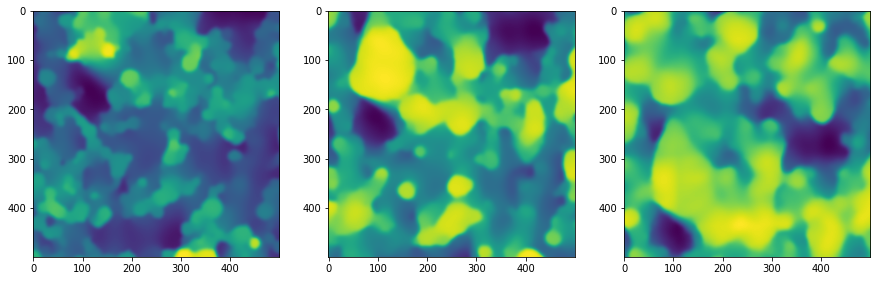

In [363]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
profiles = []
for ax, im, (x, y), label in zip(axes, ims, [l0, l1, l2], ['asbuilt', 'polished', 'more polished']):
    ax.imshow(im[x:x+500, y:y+500])

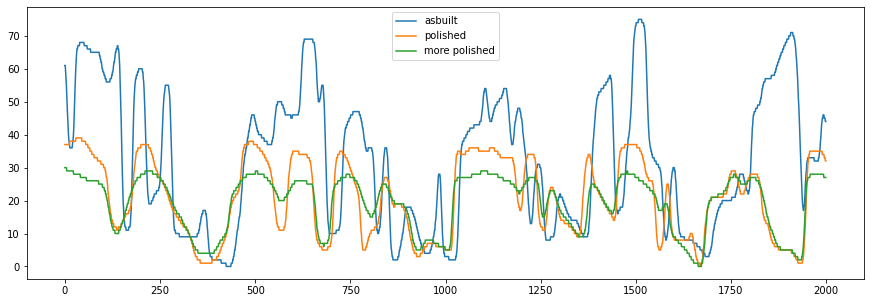

In [301]:
plt.subplots(figsize=(15, 5))
profiles = []
for im, (x, y), label in zip(ims, [l0, l1, l2], ['asbuilt', 'polished', 'more polished']):
    #plt.imshow(im[x:x+500, y:y+500])
    # profile = equalize_hist(im[x:x+500, y:y+2000])[200]
    profile = im[x:x+500, y:y+2000][200].round(decimals=0)
    plt.plot(profile-profile.min(), label=label)
    profiles.append(profile)
plt.legend()

In [302]:
from additive.experimental import extract_circles

In [303]:
profile = profiles[0]
circles = []
for profile in profiles:
    circles.append(extract_circles(np.arange(len(profile)), profile, 100))

1976 1976
1976 1976
1976 1976


In [314]:
from scipy.stats import mode
[mode(profile).mode for profile in profiles]

[array([157.], dtype=float32),
 array([141.], dtype=float32),
 array([109.], dtype=float32)]

In [313]:
[profile.mean()-profile.min() for profile in profiles]

[32.32300000000001, 21.08, 19.325996]

In [309]:
pd.concat([pd.DataFrame(circle[-1]).mean() for circle in circles], axis=1).round(decimals=2)

0        1        2
beg     845.78  1119.67   983.00
end     867.67  1143.33  1010.00
index   856.22  1131.00   996.00
h       162.00   113.89    87.88
cx        0.02     0.01    -0.00
cy        0.00    -0.00     0.00
r         0.74     0.78     0.76
x_mean  868.22  1143.00  1008.00
x_std     6.31     6.82     7.79
y_mean  156.08   111.50    87.61
y_std     3.41     2.20     1.89

In [322]:
from additive.experimental import get_cut_points
[len(profile)/len(get_cut_points(profile, mode(profile).mode[0])) for profile in profiles]

[333.3333333333333, 250.0, 285.7142857142857]

In [331]:
[len(profile)/len(get_cut_points(profile, np.percentile(profile, 30))) for profile in profiles]

[166.66666666666666, 200.0, 250.0]

In [332]:
from additive.experimental import get_ratio_under_thresh

In [347]:
[get_ratio_under_thresh(profile, np.percentile(profile, 15)) for profile in profiles]

[12.0, 9.714285714285714, 13.0]

In [355]:
tmp = [[(im<np.min(im)+t).sum()/(im.shape[0]*im.shape[1]) for im in ims]  for t in range(10, 200, 10)]

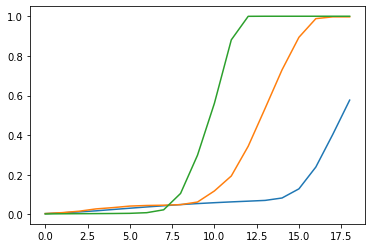

In [357]:
plt.plot(tmp)

# formalized template matching

In [366]:
%load_ext autoreload
%autoreload 2
%reset -f
from imports import *
# df = pd.read_csv("/home/ben_rasoolov/additive_project/data/paper/data/global_stats_equalize_hist_v02.csv")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [429]:
methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR,
            cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]

In [476]:
polished_files = glob.glob("/home/ben_rasoolov/additive_project/data/experiment_03/Polished*")
unpolished_files = [x.replace('Polished_', '') for x in polished_files]

In [477]:
assert len([x for x in unpolished_files if not os.path.exists(x)]) == 0
assert len(polished_files) == len(unpolished_files)

In [478]:
len(polished_files)

36

In [671]:
from additive.experimental import match_asbuilt_unpolished, get_image_from_top_left, image_correlation

## An example

In [599]:
index = 30
as_built = np.array(joblib.load(unpolished_files[index])['value'].x)
polished = np.array(joblib.load(polished_files[index])['value'].x)

In [600]:
print(unpolished_files[index])

/home/ben_rasoolov/additive_project/data/experiment_03/V07_T1_Left(Bottom)_500X_3D.info


In [588]:
r1, r2 = match_asbuilt_unpolished(as_built, polished, .7)

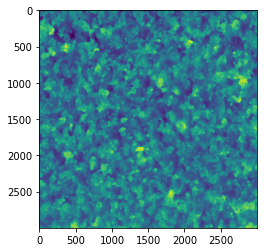

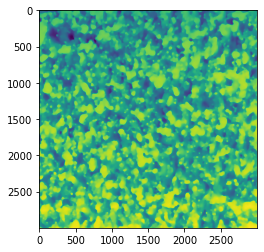

In [589]:
plt.imshow(get_image_from_top_left(as_built, r1, (1000, 1000))[:3000, :3000])
plt.show()
plt.imshow(get_image_from_top_left(polished, r2, (1000, 1000))[:3000, :3000])

In [482]:
def load_image(x):
    return np.array(joblib.load(x)['value'].x)

polished_files_b = bag.from_sequence(polished_files).map(load_image)
asbuilt_files_b = bag.from_sequence(unpolished_files).map(load_image)

In [521]:
top_left_matches_b = bag.map(match_asbuilt_unpolished, asbuilt_files_b, polished_files_b, ratio=.5)

In [522]:
with Pool(10) as p:
    with dask.config.set(pool=p):
        top_left_matches_5 = top_left_matches_b.compute()

In [610]:
top_left_matches = []
for (file, x, y, z) in zip(unpolished_files, top_left_matches_3, top_left_matches_5, top_left_matches_7):
    file = file.split('/')[-1]
    error1 = np.sqrt(((np.array(x)-np.array(y))**2).sum())
    error2 = np.sqrt(((np.array(x)-np.array(z))**2).sum())
    error3 = np.sqrt(((np.array(y)-np.array(z))**2).sum())
    if error1 < 50:
        res = x
        error = error1
    elif error2 < 50:
        res = x
        error = error2
    elif error3 < 50:
        res = y
        error = error3
    else:
        res = None
    print(res)
    top_left_matches.append(res)
    # if error > 40:
    #     print(file, error)
    #     print(file, error)

(array([ 67, 192]), array([0, 0]))
(array([0, 0]), array([ 28, 528]))
(array([73, 92]), array([0, 0]))
(array([14,  0]), array([  0, 524]))
(array([231,   0]), array([  0, 322]))
(array([257,  88]), array([0, 0]))
(array([35,  0]), array([   0, 1379]))
(array([15,  0]), array([ 0, 27]))
(array([0, 0]), array([106, 303]))
(array([100,  95]), array([0, 0]))
(array([318, 206]), array([0, 0]))
(array([0, 0]), array([ 30, 819]))
(array([232,   0]), array([  0, 430]))
(array([264, 204]), array([0, 0]))
(array([3, 0]), array([   0, 1930]))
(array([0, 0]), array([ 39, 871]))
(array([59,  0]), array([   0, 1273]))
(array([0, 0]), array([ 51, 869]))
(array([305,   0]), array([  0, 199]))
(array([ 0, 54]), array([16,  0]))
(array([ 87, 293]), array([0, 0]))
(array([ 39, 390]), array([0, 0]))
(array([320,   0]), array([  0, 522]))
(array([27,  0]), array([  0, 719]))
(array([268,  62]), array([0, 0]))
(array([301, 202]), array([0, 0]))
(array([0, 0]), array([0, 0]))
(array([371,   0]), array([  0,

In [611]:
joblib.dump((unpolished_files, unpolished_files, top_left_matches_3, top_left_matches_5, top_left_matches_7), 
            "/home/ben_rasoolov/additive_project/data/experiment_03/polished_vs_asbuilt_top_left_matches.tuple")

['/home/ben_rasoolov/additive_project/data/experiment_03/polished_vs_asbuilt_top_left_matches.tuple']

In [699]:
joblib.dump((list(unpolished_files), list(polished_files), top_left_matches, correlations), 
            "/home/ben_rasoolov/additive_project/data/experiment_03/polished_vs_asbuilt_top_left_matches.list")

['/home/ben_rasoolov/additive_project/data/experiment_03/polished_vs_asbuilt_top_left_matches.list']

### good matches:
- /home/ben_rasoolov/additive_project/data/experiment_03/V11_T2_Right(Top)_500X_3D.info 871.8726971295753

In [697]:
import random
polished_vs_asbuilt_top_left_matches = joblib.load(
    "/home/ben_rasoolov/additive_project/data/experiment_03/polished_vs_asbuilt_top_left_matches.list")
# polished_vs_asbuilt_top_left_matches = zip(*polished_vs_asbuilt_top_left_matches)

/home/ben_rasoolov/additive_project/data/experiment_03/V03_T2_Left(Bottom)_500X_3D.info


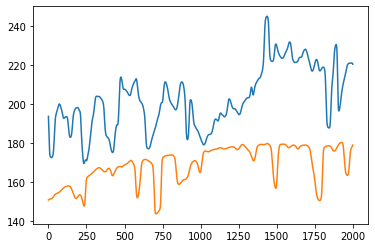

In [721]:
dxy = (500, 500)
correlations = []
for as_file, po_file, val, *_ in zip(*polished_vs_asbuilt_top_left_matches):
    print(as_file)
    if val is None:
        correlations.append(-1)
        continue
    as_tl, po_tl = val
    asbuilt = load_image(as_file)
    polished = load_image(po_file)
    x = get_image_from_top_left(asbuilt, as_tl, dxy)[:2000, 2000]
    y = get_image_from_top_left(polished, po_tl, dxy)[:2000, 2000]
    plt.plot(x)
    plt.plot(y)
    break
    # correlation = image_correlation(x, y)
    # correlations.append(correlation)
    # print(correlation)

In [708]:
tmp = joblib.load("/home/ben_rasoolov/additive_project/data/experiment_03/polished_vs_asbuilt_top_left_matches.list")
res = pd.DataFrame(sorted(zip(*tmp), key=lambda x: x[-1]), columns=['asbuilt', 'polished', 'top_left_match', 'correlation'])

In [718]:
res[(res['correlation']<1) & (res['correlation']>.21)]

asbuilt  \
13  V05_T1_Left(Bottom)_500X_3D.info   
14  V01_T1_Left(Bottom)_500X_3D.info   
15  V03_T2_Left(Bottom)_500X_3D.info   
16  V11_T2_Left(Bottom)_500X_3D.info   
17    V01_T1_Right(Top)_500X_3D.info   
18    V09_T1_Right(Top)_500X_3D.info   
19  V09_T1_Left(Bottom)_500X_3D.info   
20  V09_T2_Left(Bottom)_500X_3D.info   
21  V07_T2_Left(Bottom)_500X_3D.info   
22    V11_T1_Right(Top)_500X_3D.info   
23    V17_T2_Right(Top)_500X_3D.info   
24  V15_T2_Left(Bottom)_500X_3D.info   
25    V07_T2_Right(Top)_500X_3D.info   
26  V11_T1_Left(Bottom)_500X_3D.info   
27    V17_T1_Right(Top)_500X_3D.info   
28  V17_T1_Left(Bottom)_500X_3D.info   
29  V17_T2_Left(Bottom)_500X_3D.info   
30    V07_T1_Right(Top)_500X_3D.info   
31    V01_T2_Right(Top)_500X_3D.info   
32  V07_T1_Left(Bottom)_500X_3D.info   
33  V01_T2_Left(Bottom)_500X_3D.info   

                                     polished        top_left_match  \
13  Polished_V05_T1_Left(Bottom)_500X_3D.info    ([15, 0], [0, 27])   
14  Polished_V01_T1_Left(Bottom)_500X_3D.info  ([320, 0], [0, 522])   
15  Polished_V03_T2_Left(Bottom)_500X_3D.info   ([67, 192], [0, 0])   
16  Polished_V11_T2_Left(Bottom)_500X_3D.info   ([0, 0], [51, 869])   
17    Polished_V01_T1_Right(Top)_500X_3D.info  ([232, 0], [0, 430])   
18    Polished_V09_T1_Right(Top)_500X_3D.info   ([0, 0], [30, 819])   
19  Polished_V09_T1_Left(Bottom)_500X_3D.info   ([27, 0], [0, 719])   
20  Polished_V09_T2_Left(Bottom)_500X_3D.info  ([0, 0], [106, 303])   
21  Polished_V07_T2_Left(Bottom)_500X_3D.info  ([35, 0], [0, 1379])   
22    Polished_V11_T1_Right(Top)_500X_3D.info   ([14, 0], [0, 524])   
23    Polished_V17_T2_Right(Top)_500X_3D.info   ([304, 65], [0, 0])   
24  Polished_V15_T2_Left(Bottom)_500X_3D.info  ([318, 206], [0, 0])   
25    Polished_V07_T2_Right(Top)_500X_3D.info  ([59, 0], [0, 1273])   
26  Polished_V11_T1_Left(Bottom)_500X_3D.info   ([0, 0], [28, 528])   
27    Polished_V17_T1_Right(Top)_500X_3D.info  ([301, 202], [0, 0])   
28  Polished_V17_T1_Left(Bottom)_500X_3D.info  ([264, 204], [0, 0])   
29  Polished_V17_T2_Left(Bottom)_500X_3D.info   ([268, 62], [0, 0])   
30    Polished_V07_T1_Right(Top)_500X_3D.info   ([0, 0], [24, 646])   
31    Polished_V01_T2_Right(Top)_500X_3D.info   ([257, 88], [0, 0])   
32  Polished_V07_T1_Left(Bottom)_500X_3D.info   ([0, 0], [22, 959])   
33  Polished_V01_T2_Left(Bottom)_500X_3D.info  ([231, 0], [0, 322])   

    correlation  
13     0.240367  
14     0.244180  
15     0.268046  
16     0.276233  
17     0.280534  
18     0.286476  
19     0.292332  
20     0.303910  
21     0.315987  
22     0.327908  
23     0.330157  
24     0.350932  
25     0.352210  
26     0.356179  
27     0.378422  
28     0.406239  
29     0.456393  
30     0.493858  
31     0.515026  
32     0.529312  
33     0.540499

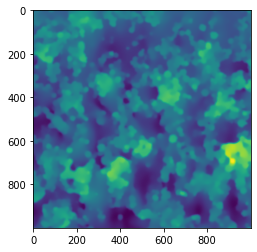

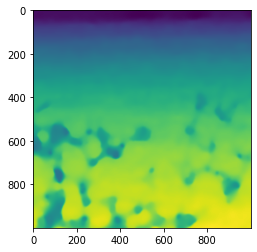

In [650]:
dxy = np.random.randint(4000, size=2)
plt.imshow(get_image_from_top_left(as_built, as_tl, dxy)[:1000, :1000])
plt.show()
plt.imshow(get_image_from_top_left(polished, po_tl, dxy)[:1000, :1000])

In [653]:
match_asbuilt_unpolished(asbuilt, polished, .7)

998 1158


(array([371,   0]), array([  0, 204]))

In [656]:
match_asbuilt_unpolished(polished, asbuilt, .8)

665 772


(array([  0, 205]), array([374,   0]))

In [52]:
data = joblib.load("../data/experiment_03/Polished_V17_T1_Left(Bottom)_500X_3D.info")
image = np.array(data['value'].x)

In [64]:
data_ab = joblib.load("../data/experiment_03/V17_T1_Left(Bottom)_500X_3D.info")
image_ab = np.array(data_ab['value'].x)

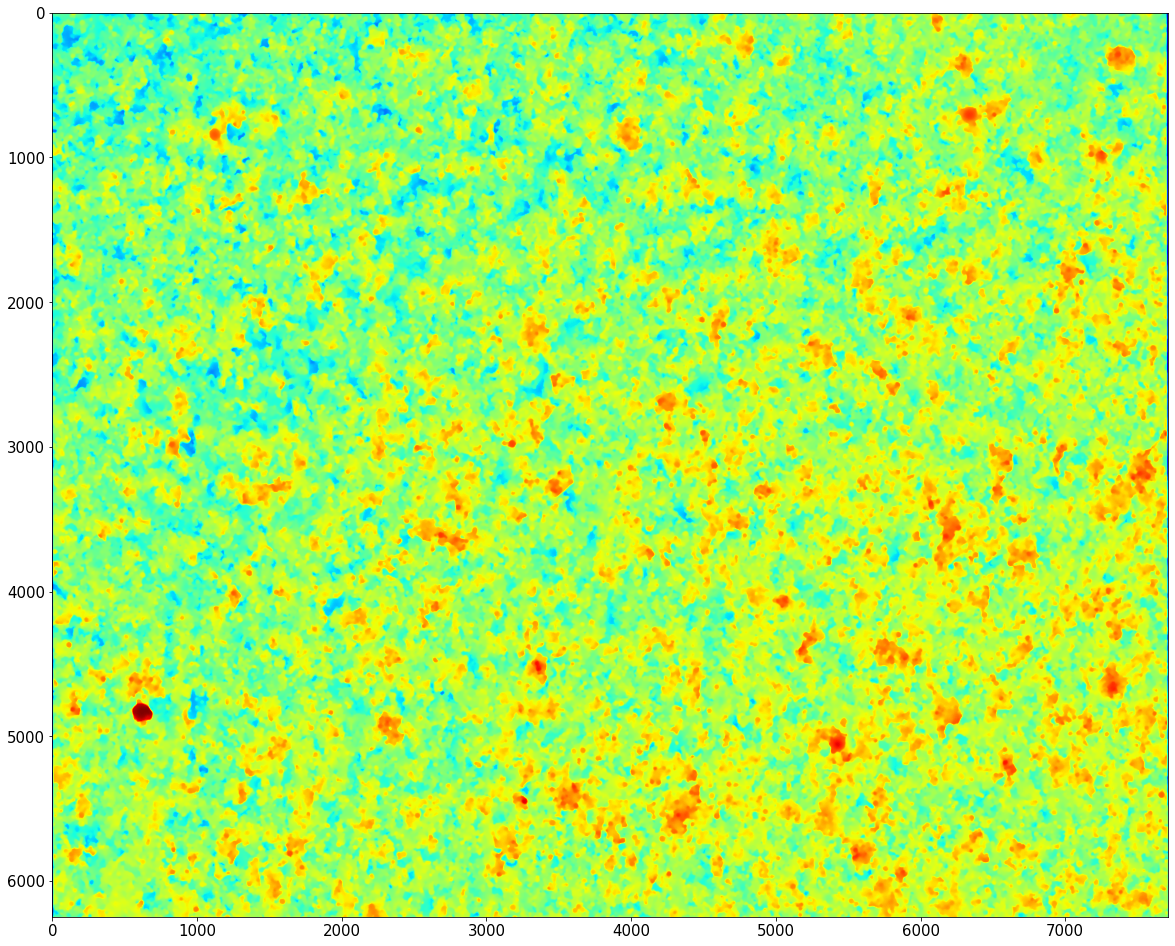

In [68]:
plt.subplots(figsize=(20, 20))
plt.imshow(image_ab[500:-500], cmap='jet')

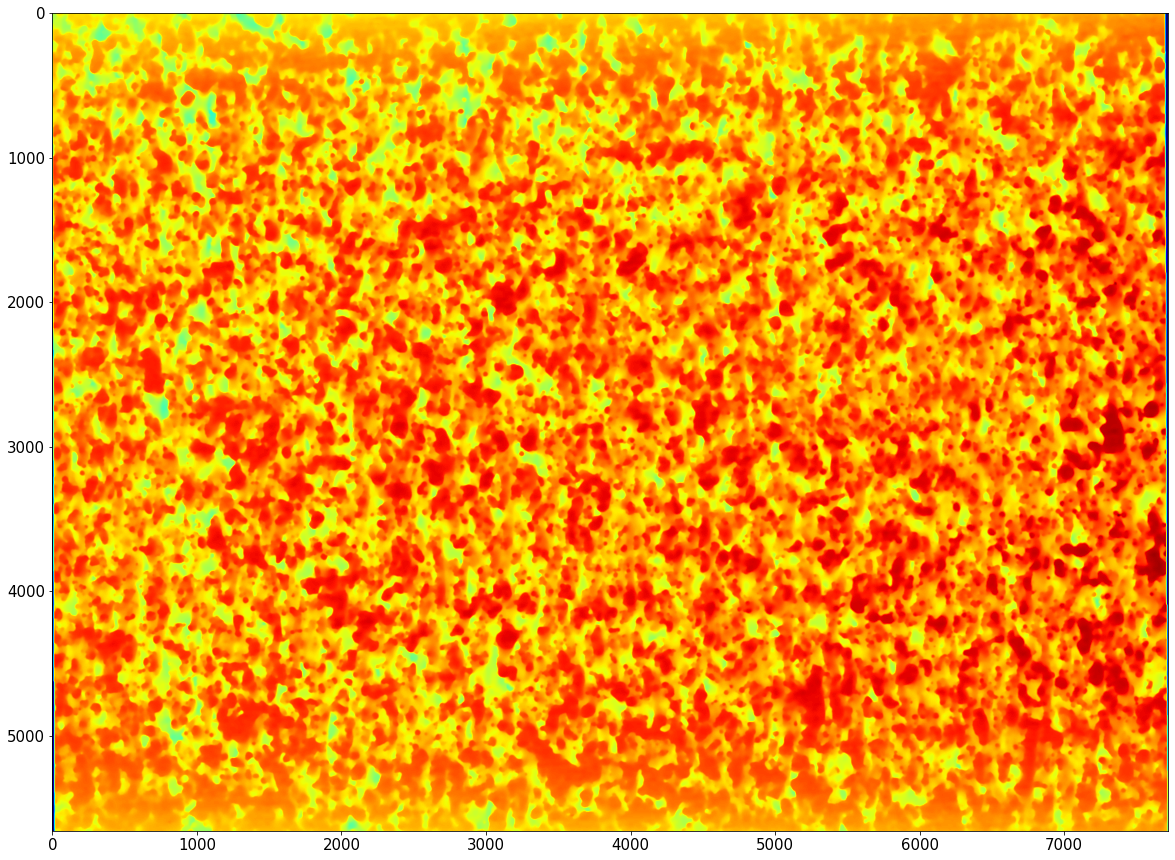

In [69]:
plt.subplots(figsize=(20, 20))
plt.imshow(image[500:-500], cmap='jet')

In [70]:
df = pd.read_csv("../data/paper/data/global_stats_equalize_hist_v02.csv")

In [77]:
df[df['specimen']=='V01'].groupby(['ispolished']).mean()

Unnamed: 0  Unnamed: 0.1      ra_1d      rq_1d    rsk_1d  \
ispolished                                                             
False            62.50         62.50  62.231259  72.038829 -0.025634   
True             46.75         46.75  56.806961  64.787442 -0.405448   

              rku_1d       rp_1d       rv_1d      ra_2d      rq_2d  \
ispolished                                                           
False       1.871606  123.833973  127.343620  63.682195  73.541757   
True        1.958130   91.148023  125.852803  63.889889  73.781657   

                 rp_2d       rv_2d    rsk_2d    rku_2d    mode_1d  mode_2d  \
ispolished                                                                   
False       126.209557  128.790443 -0.014940  1.801398  -1.056433   -23.75   
True        126.507071  128.492929 -0.006824  1.800958  67.679014    97.50   

            median        mean  
ispolished                      
False        129.5  128.790443  
True         129.0  128.492929

In [98]:
def get_v01(path):
    df2 = pd.read_csv(path)
    return df2[df2['specimen']=='V01']#.groupby(['ispolished']).mean()

In [101]:
files = glob.glob("../data/experiment_03/V01*")

In [114]:
from additive.feature_functions import *
# out_b = bag.from_sequence(files).map(lambda x: np.array(joblib.load(x)['value'].x)[500:-500])

In [108]:
with Pool(5) as pool:
    with dask.config.set(pool=pool):
        out = out_b.compute()

In [113]:
list(map(mode_2d, out))

[-10.0, -1.0, -3.0, -3.0]

In [115]:
list(map(mode_1d, out))

[-6.087558, 4.278402, -6.42732, 3.9152434]

In [117]:
pd.read_csv("../data/paper/global_stats_tilted_rotated_cropped_v02.csv")

FileNotFoundError: [Errno 2] File b'../data/paper/global_stats_tilted_rotated_cropped_v02.csv' does not exist: b'../data/paper/global_stats_tilted_rotated_cropped_v02.csv'

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from imports import *

In [391]:
# p = joblib.load('../data/experiment_03/Polished_V03_T1_Right(Top)_500X_3D.info')
p = joblib.load('../data/experiment_03/Polished_V17_T2_Left(Bottom)_500X_3D.info')

In [392]:
# a = joblib.load("../data/experiment_03/V03_T1_Right(Top)_500X_3D.info")
a = joblib.load("../data/experiment_03/V17_T2_Left(Bottom)_500X_3D.info")

In [393]:
pol = np.array(p['value'].x)[1000:-1000]

In [394]:
try: asb = a[1000:-1000]
except: asb = np.array(a['value'].x[1000:-1000])

In [395]:
from additive.experimental import match_asbuilt_unpolished, get_image_from_top_left

In [396]:
r1, r2 = match_asbuilt_unpolished(asb, pol, .4)

In [397]:
r1, r2, asb.shape, pol.shape

(array([268,  59]), array([0, 0]), (5251, 7711), (4655, 7720))

In [398]:
index = 0#np.random.randint(0, 1000)
size = 3000
asub = get_image_from_top_left(asb, r1, (1000, 1000))[index:index+size, index:index+size]
psub = get_image_from_top_left(pol, r2, (1000, 1000))[index:index+size, index:index+size]

In [399]:
from scipy.stats import pearsonr
pearsonr(asub.reshape(-1), psub.reshape(-1))

(0.4662662273241144, 0.0)

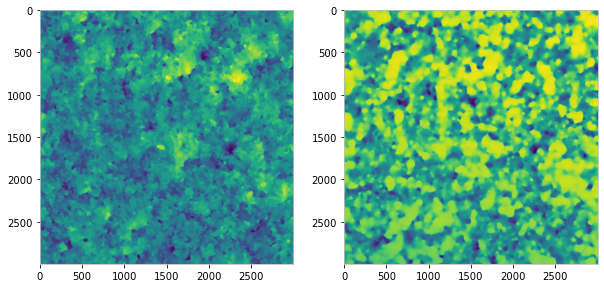

In [400]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
for ax, img in zip(axes, [asub, psub]):
    ax.imshow(img)
    ax.grid(False)

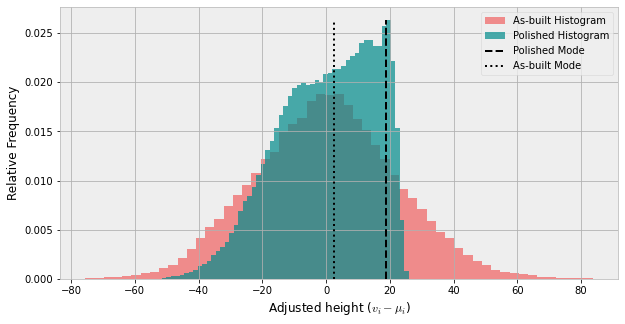

In [401]:
plt.subplots(figsize=(10, 5))
ahist = plt.hist(asub.reshape(-1)-asub.mean(), bins=55, alpha=.9, label="As-built Histogram", 
         density=True, linewidth=1, edgecolor=None, color="#F08080")
phist = plt.hist(psub.reshape(-1)-psub.mean(), bins=55, alpha=.7, label="Polished Histogram", 
         density=True, edgecolor=None, color='#008B8B')
amode = get_mode(ahist)
pmode = get_mode(phist)
height = phist[0].max()
plt.vlines(pmode, 0, height, linestyle='--', label="Polished Mode")
plt.vlines(amode, 0, height, linestyle='dotted', label="As-built Mode")
plt.xlabel("Adjusted height ($v_i - \mu_i$)")
plt.ylabel("Relative Frequency")
plt.legend()
plt.savefig("../data/paper/figures/v17_t2_left_histogram_comparison.png", dpi=300)

In [356]:
def get_mode(hist_res):
    a, b, *_ = hist_res
    return b[np.argmax(a)]

In [357]:
get_mode(phist)

6.1397524

In [351]:
ahist

(array([1.03735185e-05, 1.05752468e-05, 1.09786404e-05, 2.84119709e-05,
        2.02283611e-05, 3.93329244e-05, 7.39979119e-05, 1.40157761e-04,
        3.95491176e-04, 7.18856019e-04, 8.74690185e-04, 1.42494826e-03,
        1.78897090e-03, 2.35977609e-03, 3.11404690e-03, 3.94277659e-03,
        4.95333118e-03, 6.40340326e-03, 8.27631415e-03, 1.00573091e-02,
        1.18791601e-02, 1.40114031e-02, 1.55447041e-02, 1.64295620e-02,
        1.68020292e-02, 1.62588609e-02, 1.53999905e-02, 1.61184447e-02,
        1.52742105e-02, 1.45423006e-02, 1.24047522e-02, 1.08700985e-02,
        9.43143949e-03, 7.64070530e-03, 5.57931601e-03, 4.08498038e-03,
        3.11508425e-03, 2.30709934e-03, 2.07165133e-03, 1.40296214e-03,
        9.35980451e-04, 6.80820458e-04, 4.60353700e-04, 3.11696033e-04,
        2.16633645e-04, 1.53182290e-04, 1.18027822e-04, 1.02207973e-04,
        1.03879467e-04, 9.73669975e-05, 1.00334976e-04, 6.89552193e-05,
        4.37128545e-05, 4.92166797e-05, 8.30745942e-05]),
 array

In [408]:
df = pd.read_csv("../data/paper/data/global_stats_no_transform_v02.csv").drop('Unnamed: 0', axis=1)

In [437]:
df.groupby(['ispolished', 'specimen']).mean().to_csv("../data/paper/data/table_02_v01.csv")#.filter(regex=".*2d")

In [590]:
from scipy.stats import norm
x = norm.rvs(100, 100, size=(50, 7000))

In [591]:
freq, val = np.histogram(x, bins=100, density=True, )
val[np.argmax(freq)]

80.34676840911493

In [592]:
rng = ((x.max() - x.min())/50).round(decimals=2)

In [593]:
from additive.feature_functions import mode_1d, mode
mode(x.round(2) // rng).mode.mean() * rng

78.08422857142858

In [618]:
mode_1d(x), mode_2d(x, 50)

(-2.06, -19.559437225171564)

In [607]:
mode(x.round(0).reshape(-1))

ModeResult(mode=array([113.]), count=array([1474]))

80.34676840911493

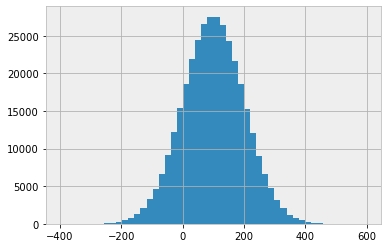

In [616]:
freq, val, *_ = plt.hist(x.reshape(-1), bins=50)
val[np.argmax(freq)]

In [617]:
freq, val, *_ = np.histogram(x.reshape(-1), bins=50)
val[np.argmax(freq)]

80.34676840911493

In [1]:
%load_ext autoreload
%autoreload 2
from imports import *
files = glob.glob("/data/additive_project/data/experiment_03/*info")

In [2]:
# client = Client(scheduler_file="/data/additive_project/jupyter/projects/schedfile")

In [3]:
from additive.feature_functions import feature_functions_functions as feat_funs
def image_stats(x, feat_funs):
    funs = {k: v for k, v in feat_funs.items()}
    return compute({k: delayed(v)(x) for k, v in funs.items()})[0]

In [4]:
from additive.preprocessing import correct_aligment, process_image

def read_file_and_get_stats(file):
    print(file)
    data = joblib.load(file)
    try: data = np.array(data['value'].x)
    except: data = np.array(data)
    image = data[500:-500, 500:-500]
    # image = process_image(image,)
    return image_stats(image, feat_funs)

In [5]:
with Pool(2) as p:
    with dask.config.set(pool=p):
        res = bag.from_sequence(files).map(read_file_and_get_stats).compute()

/data/additive_project/data/experiment_03/Polished_V09_T1_Right(Top)_500X_3D.info/data/additive_project/data/experiment_03/V06_T1_R_3d.info

/data/additive_project/data/experiment_03/V04_T1_L_3d.info
/data/additive_project/data/experiment_03/V14_T1_Right(Top)_500X_3D.info
/data/additive_project/data/experiment_03/Polished_V07_T2_Left(Bottom)_500X_3D.info
/data/additive_project/data/experiment_03/Polished_V03_T1_Left(Bottom)_500X_3D.info
/data/additive_project/data/experiment_03/V19_T1_Right(Top)_500X_3D.info
/data/additive_project/data/experiment_03/V13_T2_Right(Top)_500X_3D.info
/data/additive_project/data/experiment_03/V07_T2_Left(Bottom)_500X_3D.info
/data/additive_project/data/experiment_03/V04_T1_R_3d.info
/data/additive_project/data/experiment_03/V03_T1_L_3d.info
/data/additive_project/data/experiment_03/Polished_V07_T1_Left(Bottom)_500X_3D.info
/data/additive_project/data/experiment_03/V01_T2_Left(Bottom)_500X_3D.info
/data/additive_project/data/experiment_03/Polished_V01_T2_Rig

In [9]:
out = pd.DataFrame(res).assign(file=files)

In [11]:
from additive.utility import *

In [13]:
get_file_info(out, 'file').to_csv("../data/paper/data/global_stats_v03.csv", index=False)